<a href="https://colab.research.google.com/github/BillWorstell/BaF2_LAPPD/blob/main/SimpleOpticsPytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Pytorch

In [1]:
import torch
print(torch.__version__)
torch.manual_seed(42)

2.0.1+cu118


Import numpy, matplotlib, and icecream

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib import cm

!pip install icecream
from icecream import ic

In [3]:
# Isotopic Emission from this point – origin at geometric center of MiniBlock
# CallSimpleOpticsPhotons = Script to generate photon lists
#
NEvents=1000
#NEvents=100
NPhotons=10000
#NPhotons=1024
#NPhotons=100
ic(NEvents)
SqrtNPhotons=int(np.sqrt(NPhotons))
ic(SqrtNPhotons)

#
X= 1.5
Y=-3.0
Z= 0.

ic(X)
ic(Y)
ic(Z)
#
# Common source position for all events at the moment
XSource= torch.tensor(X)
ic(XSource.item())
XSource=XSource.repeat([NEvents, NPhotons])
ic(XSource.size())
ic(XSource[0][0])

YSource= torch.tensor(Y)
ZSource= torch.tensor(Z)
YSource=YSource.repeat([NEvents, NPhotons])
ZSource=ZSource.repeat([NEvents, NPhotons])
ic(XSource.size())
ic(XSource[0][0])
ic(YSource[0][0])
ic(ZSource[0][0])

ic| NEvents: 1000
ic| SqrtNPhotons: 100
ic| X: 1.5
ic| Y: -3.0
ic| Z: 0.0
ic| XSource.item(): 1.5
ic| XSource.size(): torch.Size([1000, 10000])
ic| XSource[0][0]: tensor(1.5000)
ic| XSource.size(): torch.Size([1000, 10000])
ic| XSource[0][0]: tensor(1.5000)
ic| YSource[0][0]: tensor(-3.)
ic| ZSource[0][0]: tensor(0.)


tensor(0.)

Pytorch script below generates N photons per tensor for M events, generated at either at fixed intervals isotropically in solid angle, or at random isotropic spherical angles

Emission is from a single point [x,y,z] in space, with emission time t_emit=0, specified here.

In [4]:
# Switch to either have random or fixed distribution of emission angles
#RandomAngles=True
RandomAngles=False
#
# Isotopic Emission from this point – origin at geometric center of MiniBlock
# CallSimpleOpticsPhotons = Script to generate photon lists
#
#NEvents=1000
#
#X=-10.5
#X=-7.5
#X=-4.5
#X=-1.5
X= 1.5
#X= 4.5
#X= 7.5
#X=10.5
#Y=11.0
#Y=9.0
#Y=7.0
#Y=5.0
#Y=3.0
#Y=1.0
#Y=-1.0
Y=-3.0
#Y=-5.0
#Y=-7.0
#Y=-9.0
#Y=-11.0
Z=0.
#Z=-(45./2.)+5.
#Z=-(45./2.)+10.
#Z=-(45./2.)+15.
#Z=-(45./2.)+20.
#Z=-(45./2.)+25.
#Z=-(45./2.)+30.
#Z=-(45./2.)+35.
#Z=-(45./2.)+40.
#
# Common source position for all events at the moment
XSource= torch.tensor(X)
YSource= torch.tensor(Y)
ZSource= torch.tensor(Z)
XSource=XSource.repeat([NEvents, NPhotons])
YSource=YSource.repeat([NEvents, NPhotons])
ZSource=ZSource.repeat([NEvents, NPhotons])
ic(XSource.size())
ic(XSource[0][0])
ic(YSource[0][0])
ic(ZSource[0][0])

ic| XSource.size(): torch.Size([1000, 10000])
ic| XSource[0][0]: tensor(1.5000)
ic| YSource[0][0]: tensor(-3.)
ic| ZSource[0][0]: tensor(0.)


tensor(0.)

Parametrize Detector Optics

In [5]:
# Index of refraction for optical barriers
#  (Air and LIOB=Laser Induced Optical Barrier)
IndexX=1.0
IndexY=1.40
#Number of photons to generate (511 keV x ideal photosensor)
NFast=172.
NSlow=1059.
# Index of refraction for fast and slow component
IndexFastBaF2=1.55
IndexSlowBaF2=1.50
# Reflectivity of mirrored surfaces
ReflectX=0.90
ReflectY=0.90
ReflectZ=0.90

Parametrize Detector Geometry

In [6]:
#Constant Geometry Parameters
DZ = 45. #mm
DetectNX = 8
dX = 3.0  #mm
DX = DetectNX * dX
XBins=torch.arange(-DX/2.,DX/2.,dX)+(dX/2.)
ic(XBins)
DetectNY = 12;
dY = 2.0; #mm
DY = DetectNY  * dY
YBins=torch.arange(-DY/2.,DY/2.,dY)+(dY/2.)
ic(YBins)
TMax=1000. #Maximum Time in ps

ic| XBins: tensor([-10.5000,  -7.5000,  -4.5000,  -1.5000,   1.5000,   4.5000,   7.5000,
                    10.5000])
ic| YBins: tensor([-11.,  -9.,  -7.,  -5.,  -3.,  -1.,   1.,   3.,   5.,   7.,   9.,  11.])


Set up for multiple passes over different emission species with different intensities and lifetimes - artificial ideal material with arbitrary intensity and zero collection time for now.

Get critical angles at optical interfaces based on optical indices.

In [7]:
photon_passes = {'Fast': (NFast, IndexFastBaF2), 'Slow': (NSlow, IndexSlowBaF2)}

#for iPhotonPass in ['Fast','Slow']:
for iPhotonPass in ['Fast']:
    NPEs, Index = photon_passes[iPhotonPass]
    CMMPerPs = 0.3/Index
    #
    # Calculate critical angle for total internal reflection at interface
    SinThetaCriticalX=torch.tensor(IndexX/Index)
    SinThetaCriticalY=torch.tensor(IndexY/Index)
ic(Index)
ic(CMMPerPs)
ic(SinThetaCriticalX)
ic(SinThetaCriticalY)

ic| Index: 1.55
ic| CMMPerPs: 0.1935483870967742
ic| SinThetaCriticalX: tensor(0.6452)
ic| SinThetaCriticalY: tensor(0.9032)


tensor(0.9032)

Check memory order

In [8]:
Test1=torch.tensor([1,2,3,4,5,6])
ic(Test1)
Test2=Test1.reshape(2,3)
ic(Test2)
Test3=Test1.reshape(3,2)
ic(Test3)
Test4=Test2.repeat(1,4)
ic(Test4)

ic| Test1: tensor([1, 2, 3, 4, 5, 6])
ic| Test2: tensor([[1, 2, 3],
                   [4, 5, 6]])
ic| Test3: tensor([[1, 2],
                   [3, 4],
                   [5, 6]])
ic| Test4: tensor([[1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3],
                   [4, 5, 6, 4, 5, 6, 4, 5, 6, 4, 5, 6]])


tensor([[1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3],
        [4, 5, 6, 4, 5, 6, 4, 5, 6, 4, 5, 6]])

Generate either random distributions of spherical angles, or a fixed spherical grid with equal solid angle subtended by grid cells. For a fixed grid, the number of photons should be the square of an integer.

In [9]:
NBins=np.ceil(np.sqrt(NPhotons))
NBins=int(np.round(2.*(np.ceil(NBins/2.))))
#
if RandomAngles:
  # Random isotropic distributions for all photons, all events
  CosZSample=1.-2.*torch.rand(NEvents,NPhotons)
  torch.pi = torch.acos(torch.zeros(1)).item() * 2 # which is 3.1415927410125732
  PhiSample=2.*torch.pi*torch.rand(NEvents,NPhotons)
else:
  # Fixed isotropic distribution
  dCosZ=2./NBins
  dPhi=(2.*np.pi)/NBins
  CosZBins=np.arange(-1.+(dCosZ/2.),1.,dCosZ)
  PhiBins=np.arange(0.+(dPhi/2.),2.*np.pi,dPhi)
  CosZMesh, PhiMesh = np.meshgrid(CosZBins, PhiBins)
  Test1=torch.from_numpy(CosZMesh.flatten())
  ic(Test1.shape)
  ic(Test1[0])
  ic(Test1[1])
  ic(Test1[10])
  ic(torch.from_numpy(CosZMesh).size())
  ic(CosZMesh[0][0])
  ic(CosZMesh[0][1])
  ic(CosZMesh[1][0])
  #
  Test2=torch.from_numpy(CosZMesh.flatten())
  ic(Test2.shape)
  Test3=Test2.repeat(NEvents,1)
  ic(Test3.shape)
  Test4=Test3.reshape(NEvents,NPhotons)
  ic(Test4.shape)
  #
  CosZSample=torch.from_numpy(CosZMesh.flatten())
  CosZSample=CosZSample.repeat(NEvents,1)
  CosZSample=CosZSample.reshape(NEvents,NPhotons)
  ic(CosZSample.size())
  ic(CosZSample[0][0])
  ic(CosZSample[1][0])
  ic(CosZSample[1][1])
  ic(CosZSample[SqrtNPhotons][0])
  #
  PhiSample=torch.from_numpy(PhiMesh.flatten())
  PhiSample=PhiSample.repeat(NEvents,1)
  PhiSample=PhiSample.reshape(NEvents,NPhotons)
  ic(PhiSample.size())
  ic(PhiSample[0][0])
  ic(PhiSample[1][0])
  ic(PhiSample[SqrtNPhotons][0])
  ic(PhiSample[SqrtNPhotons][1])


ic| Test1.shape: torch.Size([10000])
ic| Test1[0]: tensor(-0.9900, dtype=torch.float64)
ic| Test1[1]: tensor(-0.9700, dtype=torch.float64)
ic| Test1[10]: tensor(-0.7900, dtype=torch.float64)
ic| torch.from_numpy(CosZMesh).size(): torch.Size([100, 100])
ic| CosZMesh[0][0]: -0.99
ic| CosZMesh[0][1]: -0.97
ic| CosZMesh[1][0]: -0.99
ic| Test2.shape: torch.Size([10000])
ic| Test3.shape: torch.Size([1000, 10000])
ic| Test4.shape: torch.Size([1000, 10000])
ic| CosZSample.size(): torch.Size([1000, 10000])
ic| CosZSample[0][0]: tensor(-0.9900, dtype=torch.float64)
ic| CosZSample[1][0]: tensor(-0.9900, dtype=torch.float64)
ic| CosZSample[1][1]: tensor(-0.9700, dtype=torch.float64)
ic| CosZSample[SqrtNPhotons][0]: tensor(-0.9900, dtype=torch.float64)
ic| PhiSample.size(): torch.Size([1000, 10000])
ic| PhiSample[0][0]: tensor(0.0314, dtype=torch.float64)
ic| PhiSample[1][0]: tensor(0.0314, dtype=torch.float64)
ic| PhiSample[SqrtNPhotons][0]: tensor(0.0314, dtype=torch.float64)
ic| PhiSample[SqrtNP

Continuous memory elements increment CosZ (columns) in [NCosZ][NPhi]

increments in Phi make steps of NCosZ in index

Generate direction cosines and (Cartesian) velocity components

In [10]:
R = torch.sqrt(1.-torch.square(CosZSample))
vX = CMMPerPs * R * torch.cos(PhiSample)
vY = CMMPerPs * R * torch.sin(PhiSample)
vZ = CMMPerPs * CosZSample
SinTheta=CosZSample
SinPhi=torch.sin(PhiSample)
ic(R.size())
ic(vX.size())
ic(vY.size())
ic(vZ.size())
ic(SinTheta.size())
ic(SinPhi.size())

ic| R.size(): torch.Size([1000, 10000])
ic| vX.size(): torch.Size([1000, 10000])
ic| vY.size(): torch.Size([1000, 10000])
ic| vZ.size(): torch.Size([1000, 10000])
ic| SinTheta.size(): torch.Size([1000, 10000])
ic| SinPhi.size(): torch.Size([1000, 10000])


torch.Size([1000, 10000])

For Specular Optics, the vertical component of the velocity determines the collection time. The kinematics is separable in each dimension, and the velocity components change sign but not magnitude at reflection interfaces. Photons with upward z velocity component are reflected off the upper Z mirror.

In [11]:
#Clip to remove division by zero
vZ=torch.where(torch.abs(vZ)>0.0000001,vZ,0.0000001)

TTop=torch.divide(((2.*DZ)-(DZ/2.)-Z),vZ)
TBottom=torch.divide(((0.*DZ)-(DZ/2.)-Z),vZ)
TCollect=torch.maximum(TTop,TBottom)
vXCollect=X+torch.multiply(vX,TCollect)
vYCollect=Y+torch.multiply(vY,TCollect)
ic(TTop.size())
ic(TBottom.size())
ic(TCollect.size())
ic(vXCollect.size())
ic(vYCollect.size())

TCollect=torch.maximum(torch.tensor(0.000001),TCollect)
TCollect=torch.minimum(torch.tensor(TMax),TCollect)
ic(TCollect.size())
ic(TCollect.median())
ic(TCollect.amax())


ic| TTop.size(): torch.Size([1000, 10000])
ic| TBottom.size(): torch.Size([1000, 10000])
ic| TCollect.size(): torch.Size([1000, 10000])
ic| vXCollect.size(): torch.Size([1000, 10000])
ic| vYCollect.size(): torch.Size([1000, 10000])
ic| TCollect.size(): torch.Size([1000, 10000])
ic| TCollect.median(): tensor(465.0000, dtype=torch.float64)
ic| TCollect.amax(): tensor(1000., dtype=torch.float64)


tensor(1000., dtype=torch.float64)

If generating on a fixed angular grid, display the CosZ angle dependencies upon spherical angle, for the first event (and all events)

ic| RandomAngles: False


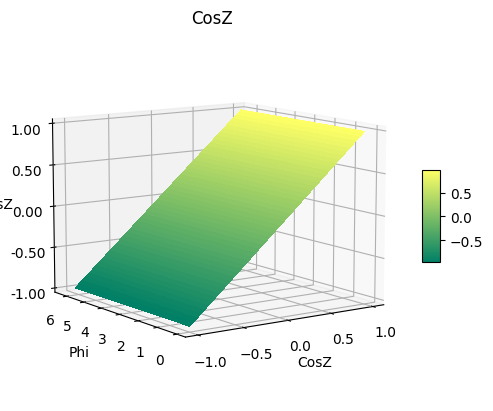

In [12]:
ic(RandomAngles)
if (RandomAngles==False):
  XX=np.reshape(CosZSample[0,:].numpy(),[NBins,NBins])
  YY=np.reshape(PhiSample[0,:].numpy(),[NBins,NBins])
  #NXReflect0=np.reshape(NXReflect[0,:].numpy(),[NBins,NBins])

  # Plot the surface.
  fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
  surf = ax.plot_surface(XX, YY, XX, cmap="summer",
                       linewidth=0, antialiased=False)
  # Customize the z axis.
  ax.set_zlim(-1.01, 1.01)
  # A StrMethodFormatter is used automatically
  ax.zaxis.set_major_formatter('{x:.02f}')
  # Set the axis labels
  ax.set_title('CosZ')
  ax.set_xlabel('CosZ')
  ax.set_ylabel('Phi')
  ax.set_zlabel('CosZ')
  # Add a color bar which maps values to colors.
  fig.colorbar(surf, shrink=0.25, aspect=5)
  ax.view_init(elev=10, azim=235, roll=0)
  plt.show()

If generating on a fixed angular grid, display the vY velocity component dependence upon spherical angle, for the first event (and all events).

ic| RandomAngles: False


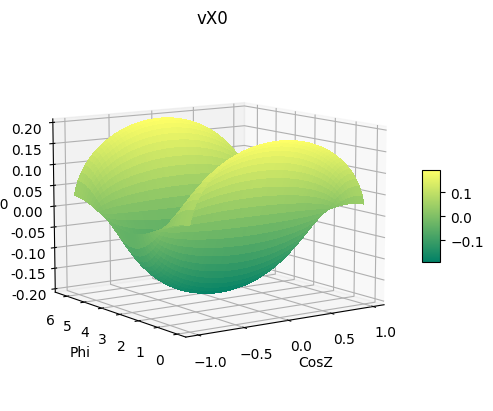

In [13]:
ic(RandomAngles)
if (RandomAngles==False):
  XX=np.reshape(CosZSample[0,:].numpy(),[NBins,NBins])
  YY=np.reshape(PhiSample[0,:].numpy(),[NBins,NBins])
  vX0=np.reshape(vX[0,:].numpy(),[NBins,NBins])

  # Plot the surface.
  fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
  surf = ax.plot_surface(XX, YY, vX0, cmap="summer",
                       linewidth=0, antialiased=False)

  # Customize the z axis.
  ax.set_zlim(-1.01, 1.01)
  # A StrMethodFormatter is used automatically
  ax.zaxis.set_major_formatter('{x:.02f}')

  # Set the axis labels
  ax.set_title('vX0')
  ax.set_xlabel('CosZ')
  ax.set_ylabel('Phi')
  ax.set_zlabel('vX0')
  ax.set_zlim(-0.2,0.2)

  # Add a color bar which maps values to colors.
  fig.colorbar(surf, shrink=0.25, aspect=5)
  ax.view_init(elev=10, azim=235, roll=0)

plt.show()

If generating on a fixed angular grid, display the vY velocity component dependence upon spherical angle, for the first event (and all events).

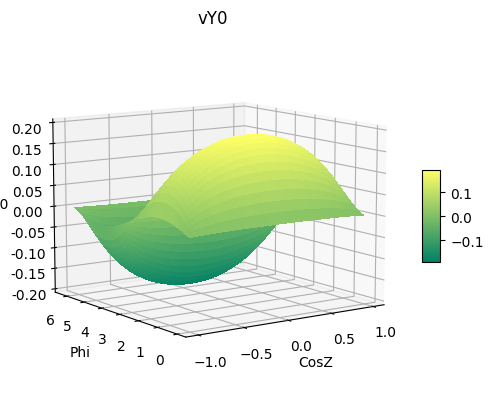

In [14]:
if (RandomAngles==False):
  XX=np.reshape(CosZSample[0,:].numpy(),[NBins,NBins])
  YY=np.reshape(PhiSample[0,:].numpy(),[NBins,NBins])
  vY0=np.reshape(vY[0,:].numpy(),[NBins,NBins])

  # Plot the surface.
  fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
  surf = ax.plot_surface(XX, YY, vY0, cmap="summer",
                       linewidth=0, antialiased=False)

  # Customize the z axis.
  ax.set_zlim(-1.01, 1.01)
  # A StrMethodFormatter is used automatically
  ax.zaxis.set_major_formatter('{x:.02f}')

  # Set the axis labels
  ax.set_title('vY0')
  ax.set_xlabel('CosZ')
  ax.set_ylabel('Phi')
  ax.set_zlabel('vY0')
  ax.set_zlim(-0.2,0.2)

  # Add a color bar which maps values to colors.
  fig.colorbar(surf, shrink=0.25, aspect=5)
  ax.view_init(elev=10, azim=235, roll=0)

  plt.show()

If generating on a fixed angular grid, display the vY\Z velocity component dependence upon spherical angle, for the first event (and all events).

ic| RandomAngles: False


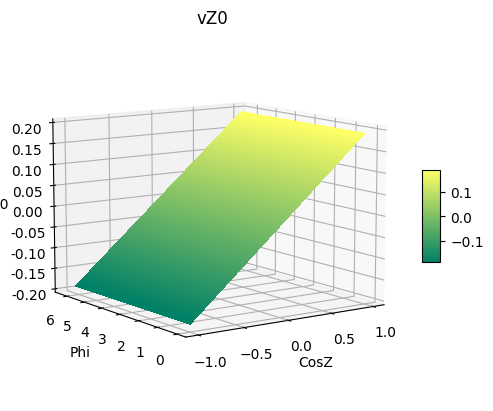

In [15]:
ic(RandomAngles)
if (RandomAngles==False):
  XX=np.reshape(CosZSample[0,:].numpy(),[NBins,NBins])
  YY=np.reshape(PhiSample[0,:].numpy(),[NBins,NBins])
  vZ0=np.reshape(vZ[0,:].numpy(),[NBins,NBins])

  # Plot the surface.
  fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
  surf = ax.plot_surface(XX, YY, vZ0, cmap="summer",
                       linewidth=0, antialiased=False)

  # Customize the z axis.
  ax.set_zlim(-1.01, 1.01)
  # A StrMethodFormatter is used automatically
  ax.zaxis.set_major_formatter('{x:.02f}')

  # Set the axis labels
  ax.set_title('vZ0')
  ax.set_xlabel('CosZ')
  ax.set_ylabel('Phi')
  ax.set_zlabel('vZ0')
  ax.set_zlim(-0.2,0.2)

  # Add a color bar which maps values to colors.
  fig.colorbar(surf, shrink=0.25, aspect=5)
  ax.view_init(elev=10, azim=235, roll=0)

  plt.show()

Display source point, intensity, and critical angles

In [16]:
ic(X)
ic(Y)
ic(Z)
ic(NFast)
ic(NSlow)
ic(NPhotons)
ic(SinThetaCriticalX)
ic(SinThetaCriticalY)

ic| X: 1.5
ic| Y: -3.0
ic| Z: 0.0
ic| NFast: 172.0
ic| NSlow: 1059.0
ic| NPhotons: 10000
ic| SinThetaCriticalX: tensor(0.6452)
ic| SinThetaCriticalY: tensor(0.9032)


tensor(0.9032)

If generating on a fixed angular grid, display the Collection Time [ps] dependence upon spherical angle, for the first event (and all events).

ic| RandomAngles: False


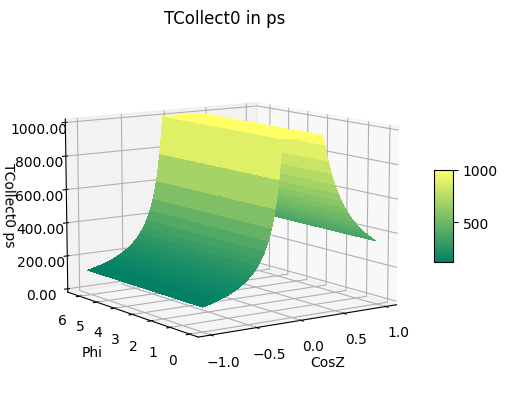

In [17]:
ic(RandomAngles)
if (RandomAngles==False):
  XX=np.reshape(CosZSample[0,:].numpy(),[NBins,NBins])
  YY=np.reshape(PhiSample[0,:].numpy(),[NBins,NBins])
  TCollect0=np.reshape(TCollect[0,:].numpy(),[NBins,NBins])
  #
  # Plot the surface.
  fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
  surf = ax.plot_surface(XX, YY, TCollect0, cmap="summer",
                         linewidth=0, antialiased=False)
  #
  # Customize the z axis.
  ax.set_zlim(-1.01, 1.01)
  # A StrMethodFormatter is used automatically
  ax.zaxis.set_major_formatter('{x:.02f}')
  # Set the axis labels
  ax.set_title('TCollect0 in ps')
  ax.set_xlabel('CosZ')
  ax.set_ylabel('Phi')
  ax.set_zlabel('TCollect0 ps')
  ax.set_zlim(0.,TMax)
  # Add a color bar which maps values to colors.
  fig.colorbar(surf, shrink=0.25, aspect=5)
  ax.view_init(elev=10, azim=235, roll=0)
  plt.show()

Determine which photons will undergo total internal reflection at each of the interfaces, and the total number reflections in both x and y directions for each photon.

In [18]:
photon_passes = {'Fast': (NFast, IndexFastBaF2), 'Slow': (NSlow, IndexSlowBaF2)}

#for iPhotonPass in ['Fast','Slow']:

# Calculate critical angle for total internal reflection at interface
# Set up data structures for 6 different reflection type cases
# depending on signs of VX, VY, snf vZ. Indices of medium and reflector then
# provide critical angle for this reflection to be total internal
#
# Condition for total internal reflection off X or Y planes
TIRX=torch.abs(SinTheta)>torch.abs(SinThetaCriticalX)
TIRY=torch.abs(SinTheta)>torch.abs(SinThetaCriticalY)
ic(TIRX.size())
ic(TIRY.size())
#
#Distance between reflections
DReflectX=torch.where(TIRX,dX,DX)
DReflectY=torch.where(TIRY,dY,DY)
ic(DReflectX.size())
ic(DReflectY.size())
#
#Unfold hall of mirrors into virtual detector
# Virtual detector collection ray lengths
DVXCollect=torch.abs(vX)*TCollect
DVYCollect=torch.abs(vY)*TCollect
ic(DVXCollect.size())
ic(DVYCollect.size())
#
# Number Reflections
NXReflect=torch.floor(DVXCollect/DReflectX)
NYReflect=torch.floor(DVYCollect/DReflectY)
ic(NXReflect.size())
ic(NYReflect.size())
#


ic| TIRX.size(): torch.Size([1000, 10000])
ic| TIRY.size(): torch.Size([1000, 10000])
ic| DReflectX.size(): torch.Size([1000, 10000])
ic| DReflectY.size(): torch.Size([1000, 10000])
ic| DVXCollect.size(): torch.Size([1000, 10000])
ic| DVYCollect.size(): torch.Size([1000, 10000])
ic| NXReflect.size(): torch.Size([1000, 10000])
ic| NYReflect.size(): torch.Size([1000, 10000])


torch.Size([1000, 10000])

Use infinite mirror isometries to map from a virtual system tiling the plane with a double layer of reflected unit cells onto the real system detection coordinates in X and Y.

Generate Reflection Survival Probabilies based on the number of reflections off each type of interface.

In [19]:
#
# Local emission coordinates within unit cell with origin at cell center
X0=torch.remainder(X+(DX/2.),DReflectX)-(DX/2.)
Y0=torch.remainder(Y+(DY/2.),DReflectY)-(DY/2.)
ic(X0.size())
ic(Y0.size())
#
# Check whether first reflection is before being detected
TFirstX=torch.where(vX>0,np.divide((DReflectX/2.)-X0,vX),torch.divide(X0-(DReflectX/2.),vX))
TFirstY=torch.where(vY>0,np.divide((DReflectY/2.)-Y0,vY),torch.divide(Y0-(DReflectY/2.),vY))
ic(TFirstX.size())
ic(TFirstY.size())
#
# If there is a reflection before detection, increment the Reflection counter
NXReflect=torch.where(TCollect<TFirstX,NXReflect,NXReflect+1)
NYReflect=torch.where(TCollect<TFirstY,NYReflect,NYReflect+1)
ic(NXReflect.size())
ic(NYReflect.size())
#
# Get Reflection Survival Probability
# Reflectivity of mirrored surfaces
SurviveXReflect=torch.where(TIRX,1.,torch.pow(ReflectX,NXReflect))
SurviveYReflect=torch.where(TIRY,1.,torch.pow(ReflectY,NYReflect))
SurviveZReflect=torch.where(vZ>0,ReflectZ,1.)
SurviveReflect =torch.multiply(torch.multiply(SurviveXReflect,SurviveYReflect),SurviveZReflect)
ic(SurviveXReflect.size())
ic(SurviveYReflect.size())
ic(SurviveZReflect.size())
ic(SurviveReflect.size())


ic| X0.size(): torch.Size([1000, 10000])
ic| Y0.size(): torch.Size([1000, 10000])
ic| TFirstX.size(): torch.Size([1000, 10000])
ic| TFirstY.size(): torch.Size([1000, 10000])
ic| NXReflect.size(): torch.Size([1000, 10000])
ic| NYReflect.size(): torch.Size([1000, 10000])
ic| SurviveXReflect.size(): torch.Size([1000, 10000])
ic| SurviveYReflect.size(): torch.Size([1000, 10000])
ic| SurviveZReflect.size(): torch.Size([1000, 10000])
ic| SurviveReflect.size(): torch.Size([1000, 10000])


torch.Size([1000, 10000])

Print source position, mean survival probability, and the size of photon lists for the first event

In [20]:
print("X=",X)
print("Y=",Y)
print("Z=",Z)
print("MeanSurvive= " + str(SurviveReflect.mean()))
#
ic(CosZSample[0,:].numpy().shape)
ic(PhiSample[0,:].numpy().shape)
ic(NXReflect[0,:].numpy().shape)
#


ic| CosZSample[0,:].numpy().shape: (10000,)
ic| PhiSample[0,:].numpy().shape: (10000,)


X= 1.5
Y= -3.0
Z= 0.0
MeanSurvive= tensor(0.6157, dtype=torch.float64)


ic| NXReflect[0,:].numpy().shape: (10000,)


(10000,)

If generating on a fixed angular grid, display the number of X, Y, and combined reflections dependent upon spherical angle for the first event.

ic| RandomAngles: False


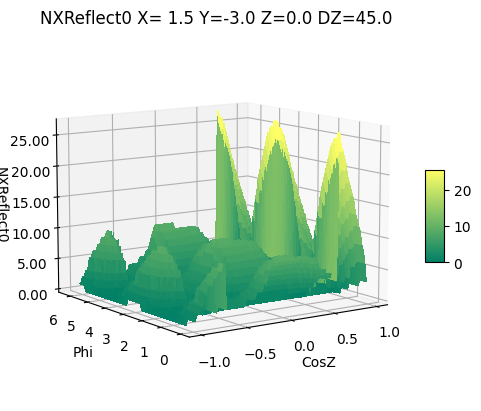

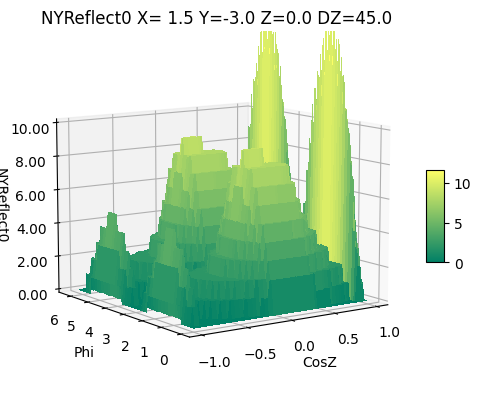

In [21]:
ic(RandomAngles)
if (RandomAngles==False):
  XX=np.reshape(CosZSample[0,:].numpy(),[NBins,NBins])
  YY=np.reshape(PhiSample[0,:].numpy(),[NBins,NBins])
  NXReflect0=np.reshape(NXReflect[0,:].numpy(),[NBins,NBins])
  NYReflect0=np.reshape(NYReflect[0,:].numpy(),[NBins,NBins])
  #
  # Plot the surface.
  fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
  surf = ax.plot_surface(XX, YY, np.minimum(100,NXReflect0), cmap="summer",
                       linewidth=0, antialiased=False)

  # A StrMethodFormatter is used automatically
  ax.zaxis.set_major_formatter('{x:.02f}')
  #
  # Set the axis labels
  #ax.set_title('NXReflect')
  ax.set_title("NXReflect0 X= "+str(X) + " Y=" + str(Y) + " Z=" + str(Z) + " DZ=" + str(DZ) )
  ax.set_xlabel('CosZ')
  ax.set_ylabel('Phi')
  ax.set_zlabel('NXReflect0')
  #
  # Add a color bar which maps values to colors.
  fig.colorbar(surf, shrink=0.25, aspect=5)
  ax.view_init(elev=10, azim=235, roll=0)
  #
  plt.show()
  #
  # Plot the surface.
  fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
  surf = ax.plot_surface(XX, YY, np.minimum(50,NYReflect0), cmap="summer",
                       linewidth=0, antialiased=False)
  #
  # A StrMethodFormatter is used automatically
  ax.zaxis.set_major_formatter('{x:.02f}')
  # Set the axis labels
  #ax.set_title('NYReflect0')
  ax.set_title("NYReflect0 X= "+str(X) + " Y=" + str(Y) + " Z=" + str(Z) + " DZ=" + str(DZ) )
  ax.set_xlabel('CosZ')
  ax.set_ylabel('Phi')
  ax.set_zlabel('NYReflect0')
  ax.set_zlim(0.,10)
  # Add a color bar which maps values to colors.
  fig.colorbar(surf, shrink=0.25, aspect=5)
  ax.view_init(elev=10, azim=235, roll=0)
  plt.show()

If generating on a fixed angular grid, display the cumulative X, Y, and combined reflection survival probabilities, plus the (truncated) Collection Time in [ps], dependent upon spherical angle for the first event.

ic| RandomAngles: False


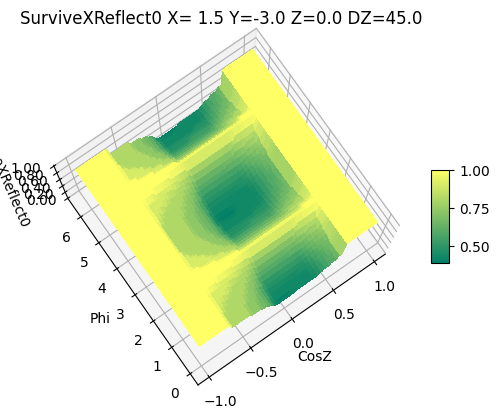

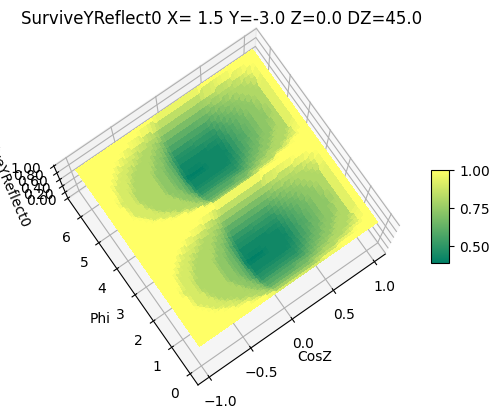

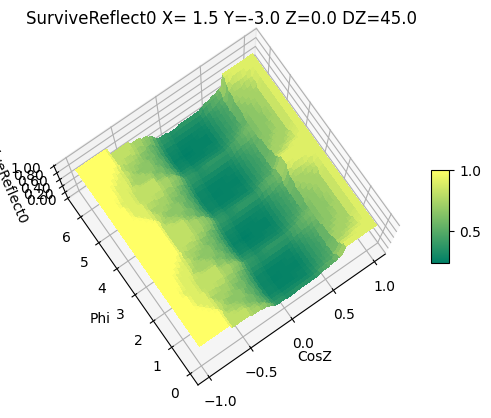

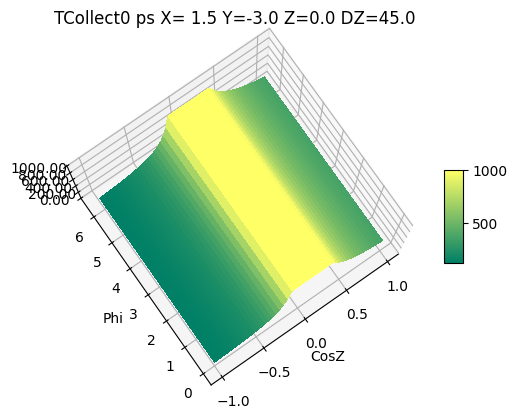

In [22]:
ic(RandomAngles)
if (RandomAngles==False):
  XX=np.reshape(CosZSample[0,:].numpy(),[NBins,NBins])
  YY=np.reshape(PhiSample[0,:].numpy(),[NBins,NBins])
  SurviveXReflect0=np.reshape(SurviveXReflect[0,:].numpy(),[NBins,NBins])
  SurviveYReflect0=np.reshape(SurviveYReflect[0,:].numpy(),[NBins,NBins])
  SurviveReflect0=np.reshape(SurviveReflect[0,:].numpy(),[NBins,NBins])
  TCollect0=np.reshape(TCollect[0,:].numpy(),[NBins,NBins])
  #
  # Plot the surface.

  fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
  surf = ax.plot_surface(XX, YY, SurviveXReflect0, cmap="summer",
                       linewidth=0, antialiased=False)

  # Customize the z axis.
  ax.set_zlim(-1.01, 1.01)
  # A StrMethodFormatter is used automatically
  ax.zaxis.set_major_formatter('{x:.02f}')
  # Set the axis labels
  #ax.set_title('SurviveXReflect0')
  ax.set_title("SurviveXReflect0 X= "+str(X) + " Y=" + str(Y) + " Z=" + str(Z) + " DZ=" + str(DZ) )
  ax.set_xlabel('CosZ')
  ax.set_ylabel('Phi')
  ax.set_zlabel('SurviveXReflect0')
  # Add a color bar which maps values to colors.
  #ax.view_init(elev=10, azim=235, roll=0)
  ax.view_init(elev=80, azim=235, roll=0)
  ax.set_zlim(0.,1.)
  # Add a color bar which maps values to colors.
  fig.colorbar(surf, shrink=0.25, aspect=5)

  # Plot the surface.
  fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
  surf = ax.plot_surface(XX, YY, SurviveYReflect0, cmap="summer",
                       linewidth=0, antialiased=False)

  # Customize the z axis.
  ax.set_zlim(-1.01, 1.01)
  # A StrMethodFormatter is used automatically
  ax.zaxis.set_major_formatter('{x:.02f}')

  # Set the axis labels
  ax.set_title("SurviveYReflect0 X= "+str(X) + " Y=" + str(Y) + " Z=" + str(Z) + " DZ=" + str(DZ) )
  #ax.set_title('SurviveYReflect0')
  ax.set_xlabel('CosZ')
  ax.set_ylabel('Phi')
  ax.set_zlabel('SurviveYReflect0')
  # Add a color bar which maps values to colors.
  #ax.view_init(elev=10, azim=235, roll=0)
  ax.view_init(elev=80, azim=235, roll=0)
  ax.set_zlim(0.,1.)

  # Add a color bar which maps values to colors.
  fig.colorbar(surf, shrink=0.25, aspect=5)

  # Plot the surface.
  fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
  surf = ax.plot_surface(XX, YY, SurviveReflect0, cmap="summer",
                       linewidth=0, antialiased=False)

  # Customize the z axis.
  ax.set_zlim(-1.01, 1.01)
  # A StrMethodFormatter is used automatically
  ax.zaxis.set_major_formatter('{x:.02f}')
  # Set the axis labels
  #ax.set_title('SurviveReflect0')
  ax.set_title("SurviveReflect0 X= "+str(X) + " Y=" + str(Y) + " Z=" + str(Z) + " DZ=" + str(DZ) )
  ax.set_xlabel('CosZ')
  ax.set_ylabel('Phi')
  ax.set_zlabel('SurviveReflect0')
  # Add a color bar which maps values to colors.
  #ax.view_init(elev=10, azim=235, roll=0)
  ax.view_init(elev=80, azim=235, roll=0)
  ax.set_zlim(0.,1.)
  # Add a color bar which maps values to colors.
  fig.colorbar(surf, shrink=0.25, aspect=5)

  #Plot the surface.
  fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
  surf = ax.plot_surface(XX, YY, np.minimum(TMax,TCollect0), cmap="summer",
                       linewidth=0, antialiased=False)

  # Customize the z axis.
  ax.set_zlim(-1.01, 1.01)
  # A StrMethodFormatter is used automatically
  ax.zaxis.set_major_formatter('{x:.02f}')
  ax.set_xlabel('CosZ')
  ax.set_ylabel('Phi')
  #ax.set_zlabel('TCollect0 ps')
  ax.set_title("TCollect0 ps X= "+str(X) + " Y=" + str(Y) + " Z=" + str(Z) + " DZ=" + str(DZ) )
  # Add a color bar which maps values to colors.
  #ax.view_init(elev=10, azim=235, roll=0)
  ax.view_init(elev=80, azim=235, roll=0)
  ax.set_zlim(0.,TMax)
  # Add a color bar which maps values to colors.
  fig.colorbar(surf, shrink=0.25, aspect=5)
  plt.show()

Perform parallel calculations for all the photon list entries for all the events, and print out the first event photon list attributes for a specified sample photon [debugging tool]

Find detection point in virtual detector within a reflected virtual unit cell, then map back onto real detection point within a real unit cell.

Size of unit cell depends upon whether or not total internal reflection in each direction.

All photon list parameters values for the specified test photon are displayed, for the first event.



In [23]:
# Print out central test case

TestCosZ=int(NBins/2)
TestPhi=int(NBins/2)
#
print("X=",X)
print("Y=",Y)
print("Z=",Z)
#
print("TestCosZ=",TestCosZ)
print("TestPhi=",TestPhi)

if (RandomAngles==False):
  vX0=np.reshape(vX[0,:].numpy(),[NBins,NBins])
  vY0=np.reshape(vY[0,:].numpy(),[NBins,NBins])
  vZ0=np.reshape(vZ[0,:].numpy(),[NBins,NBins])
  print("vX0[TestPhi,TestCosZ]=",vX0[TestPhi,TestCosZ])
  print("vY0[TestPhi,TestCosZ]=",vY0[TestPhi,TestCosZ])
  print("vZ0[TestPhi,TestCosZ]=",vZ0[TestPhi,TestCosZ])
#
photon_passes = {'Fast': (NFast, IndexFastBaF2), 'Slow': (NSlow, IndexSlowBaF2)}
for iPhotonPass in ['Fast']:
  NPEs, Index = photon_passes[iPhotonPass]
  NPEs=NPhotons

print("NPEs=",NPEs)
print("Index=",Index)
# Calculate critical angle for total internal reflection at interface
SinThetaCriticalX=IndexX/Index
print("SinThetaCriticalX=",SinThetaCriticalX)
SinThetaCriticalY=IndexY/Index
print("SinThetaCriticalY=",SinThetaCriticalY)
# Set up data structures for 6 different reflection type cases
# depending on signs of VX, VY, snf vZ. Indices of medium and reflector then
# provide critical angle for this reflection to be total internal
#
# Condition for total internal reflection off X or Y planes
TIRX=torch.abs(SinTheta)>torch.abs(torch.tensor(SinThetaCriticalX))
TIRY=torch.abs(SinTheta)>torch.abs(torch.tensor(SinThetaCriticalY))
if (RandomAngles==False):
  TIRX0=np.reshape(TIRX[0,:].numpy(),[NBins,NBins])
  TIRY0=np.reshape(TIRY[0,:].numpy(),[NBins,NBins])
  print("TIRX0[TestPhi,TestCosZ]=",TIRX0[TestPhi,TestCosZ])
  print("TIRY0[TestPhi,TestCosZ]=",TIRY0[TestPhi,TestCosZ])
#
#Distance between reflections
DReflectX=torch.where(TIRX,dX,DX)
DReflectY=torch.where(TIRY,dY,DY)
if (RandomAngles==False):
  DReflectX0=np.reshape(DReflectX[0,:].numpy(),[NBins,NBins])
  DReflectY0=np.reshape(DReflectY[0,:].numpy(),[NBins,NBins])
  print("DReflectX0[TestPhi,TestCosZ]=",DReflectX0[TestPhi,TestCosZ])
  print("DReflectY0[TestPhi,TestCosZ]=",DReflectY0[TestPhi,TestCosZ])
#
#Unfold hall of mirrors into virtual detector
# Virtual detector collection ray lengths
DVXCollect=torch.abs(vX)*TCollect
DVYCollect=torch.abs(vY)*TCollect
if (RandomAngles==False):
  DVXCollect0=np.reshape(DVXCollect[0,:].numpy(),[NBins,NBins])
  DVYCollect0=np.reshape(DVYCollect[0,:].numpy(),[NBins,NBins])
  print("DVXCollect0[TestPhi,TestCosZ]=",DVXCollect0[TestPhi,TestCosZ])
  print("DVYCollect0[TestPhi,TestCosZ]=",DVYCollect0[TestPhi,TestCosZ])
#
# Find Collection coordinates in virtual detector
VXDetect=X + torch.multiply(TCollect,vX)
VYDetect=Y + torch.multiply(TCollect,vY)
if (RandomAngles==False):
  VXDetect0=np.reshape(VXDetect[0,:].numpy(),[NBins,NBins])
  VYDetect0=np.reshape(VYDetect[0,:].numpy(),[NBins,NBins])
  print("VXDetect0[TestPhi,TestCosZ]=",VXDetect0[TestPhi,TestCosZ])
  print("VYDetect0[TestPhi,TestCosZ]=",VYDetect0[TestPhi,TestCosZ])
#
# Get offset of virtual detection position unit cell center
OffsetX=torch.where(vX>0,torch.remainder(VXDetect+(DX/2),DReflectX)-(DReflectX/2),-torch.remainder(-VXDetect+(DReflectX/2),DReflectX)+(DReflectX/2))
OffsetY=torch.where(vY>0,torch.remainder(VYDetect+(DY/2),DReflectY)-(DReflectY/2),-torch.remainder(-VYDetect+(DReflectY/2),DReflectY)+(DReflectY/2))
if (RandomAngles==False):
  OffsetX0=np.reshape(OffsetX[0,:].numpy(),[NBins,NBins])
  OffsetY0=np.reshape(OffsetY[0,:].numpy(),[NBins,NBins])
  print("OffsetX0[TestPhi,TestCosZ]=",OffsetX0[TestPhi,TestCosZ])
  print("OffsetY0[TestPhi,TestCosZ]=",OffsetY0[TestPhi,TestCosZ])
#
# Get offset of virtual detection point within unit cell
XOffset=torch.where(VXDetect>0,DReflectX*torch.floor_divide(VXDetect,DReflectX),DReflectX*torch.floor_divide(-VXDetect,DReflectX))
YOffset=torch.where(VYDetect>0,DReflectY*torch.floor_divide(VYDetect,DReflectY),DReflectY*torch.floor_divide(-VYDetect,DReflectY))
if (RandomAngles==False):
  XOffset0=np.reshape(XOffset[0,:].numpy(),[NBins,NBins])
  YOffset0=np.reshape(YOffset[0,:].numpy(),[NBins,NBins])
  print("XOffset0[TestPhi,TestCosZ]=",XOffset0[TestPhi,TestCosZ])
  print("YOffset0[TestPhi,TestCosZ]=",YOffset0[TestPhi,TestCosZ])
#
# Check whether first reflection is before being detected
TFirstX=torch.empty(vX.shape,dtype=float)
TFirstY=torch.empty(vY.shape,dtype=float)
TFirstX=torch.where(torch.multiply(vX>0,~TIRX),torch.divide((DX/2.)-X,vX),TFirstX)
TFirstX=torch.where(torch.multiply(vX<0,~TIRX),torch.divide(X-(DX/2.),vX),TFirstX)
TFirstX=torch.where(torch.multiply(vX>0, TIRX),torch.divide((dX/2.)-(X-XOffset),vX),TFirstX)
TFirstX=torch.where(torch.multiply(vX<0, TIRX),torch.divide((XOffset-X)-(dX/2.),vX),TFirstX)
TFirstY=torch.where(torch.multiply(vY>0,~TIRY),torch.divide((DY/2.)-Y,vY),TFirstY)
TFirstY=torch.where(torch.multiply(vY<0,~TIRY),torch.divide(Y-(DY/2.),vY),TFirstY)
TFirstY=torch.where(torch.multiply(vY>0, TIRY),torch.divide((dY/2.)-(Y-YOffset),vY),TFirstY)
TFirstY=torch.where(torch.multiply(vY<0, TIRY),torch.divide((YOffset-Y)-(dY/2.),vY),TFirstY)
if (RandomAngles==False):
  TFirstX0=np.reshape(TFirstX[0,:].numpy(),[NBins,NBins])
  TFirstY0=np.reshape(TFirstY[0,:].numpy(),[NBins,NBins])
  print("TFirstX0[TestPhi,TestCosZ]=",TFirstX0[TestPhi,TestCosZ])
  print("TFirstY0[TestPhi,TestCosZ]=",TFirstY0[TestPhi,TestCosZ])
#
# Number Reflections resulting in complete transits of unit cell
NXWallToWall=torch.floor(DVXCollect/DReflectX)
NYWallToWall=torch.floor(DVYCollect/DReflectY)
#
# Get time for traversal of all wall-to-wall reflection pairs
TXWallToWall=torch.divide(torch.multiply(DReflectX,NXWallToWall),torch.abs(vX))
TYWallToWall=torch.divide(torch.multiply(DReflectY,NYWallToWall),torch.abs(vY))
if (RandomAngles==False):
  TXWallToWall0=np.reshape(TXWallToWall[0,:].numpy(),[NBins,NBins])
  TYWallToWall0=np.reshape(TYWallToWall[0,:].numpy(),[NBins,NBins])
  print("TXWallToWall[TestPhi,TestCosZ]=",TXWallToWall[TestPhi,TestCosZ])
  print("TYWallToWall[TestPhi,TestCosZ]=",TYWallToWall[TestPhi,TestCosZ])
#
# Check time of first reflection
NXWalltoWall=torch.where(TCollect<TFirstX,0,NXWallToWall)
NYWallToWall=torch.where(TCollect<TFirstY,0,NYWallToWall)
TLastX=torch.where(TCollect<TFirstX,0,TFirstX+TXWallToWall)
TLastY=torch.where(TCollect<TFirstY,0,TFirstY+TYWallToWall)
if (RandomAngles==False):
  TLastX0=np.reshape(TLastX[0,:].numpy(),[NBins,NBins])
  TLastY0=np.reshape(TLastY[0,:].numpy(),[NBins,NBins])
  print("TLastX0[TestPhi,TestCosZ]=",TLastX0[TestPhi,TestCosZ])
  print("TLastY0[TestPhi,TestCosZ]=",TLastY0[TestPhi,TestCosZ])
#
# If there is no reflection before finst detection, decrement the Reflection counter
NXWalltoWall=torch.where(TCollect<TFirstX,torch.maximum(torch.tensor([0]),NXWallToWall-1),NXWallToWall)
NYWallToWall=torch.where(TCollect<TFirstY,torch.maximum(torch.tensor([0]),NYWallToWall-1),NYWallToWall)
# If there is no reflection before final detection, decrement the Reflection counter
NXWalltoWall=torch.where(TCollect<TLastX,torch.maximum(torch.tensor([0]),NXWallToWall-1),NXWallToWall)
NYWallToWall=torch.where(TCollect<TLastY,torch.maximum(torch.tensor([0]),NYWallToWall-1),NYWallToWall)
if (RandomAngles==False):
  NXWallToWall0=np.reshape(NXWallToWall[0,:].numpy(),[NBins,NBins])
  NYWallToWall0=np.reshape(NYWallToWall[0,:].numpy(),[NBins,NBins])
  print("NXWallToWall0[TestPhi,TestCosZ]=",NXWallToWall0[TestPhi,TestCosZ])
  print("NYWallToWall0[TestPhi,TestCosZ]=",NYWallToWall0[TestPhi,TestCosZ])
#
# If there is a reflection before detection, increment the Reflection counter
NXReflect=torch.where(TCollect<TFirstX,0,NXWallToWall+1)
NYReflect=torch.where(TCollect<TFirstY,0,NYWallToWall+1)
if (RandomAngles==False):
  NXReflect0=np.reshape(NXReflect[0,:].numpy(),[NBins,NBins])
  NYReflect0=np.reshape(NYReflect[0,:].numpy(),[NBins,NBins])
  print("NXReflect0[TestPhi,TestCosZ]=",NXReflect0[TestPhi,TestCosZ])
  print("NYReflect0[TestPhi,TestCosZ]=",NYReflect0[TestPhi,TestCosZ])
#
# Get Reflection Survival Probability
SurviveXReflect=torch.where(TIRX,1.,torch.pow(ReflectX,NXReflect))
SurviveYReflect=torch.where(TIRY,1.,torch.pow(ReflectY,NYReflect))
SurviveZReflect=torch.where(vZ>0,ReflectZ,1.)
SurviveReflect=torch.multiply(torch.multiply(SurviveXReflect,SurviveYReflect),SurviveZReflect)
if (RandomAngles==False):
  SurviveXReflect0=np.reshape(SurviveXReflect[0,:].numpy(),[NBins,NBins])
  SurviveYReflect0=np.reshape(SurviveYReflect[0,:].numpy(),[NBins,NBins])
  SurviveZReflect0=np.reshape(SurviveZReflect[0,:].numpy(),[NBins,NBins])
  SurviveReflect0=np.reshape(SurviveReflect[0,:].numpy(),[NBins,NBins])
  print("SurviveXReflect0[TestPhi,TestCosZ]=",SurviveXReflect0[TestPhi,TestCosZ])
  print("SurviveYReflect0[TestPhi,TestCosZ]=",SurviveYReflect0[TestPhi,TestCosZ])
  print("SurviveZReflect0[TestPhi,TestCosZ]=",SurviveZReflect0[TestPhi,TestCosZ])
  print("SurviveReflect0[TestPhi,TestCosZ]=",SurviveReflect0[TestPhi,TestCosZ])
#
# Shift the TIR photons to their TIR unit cell, and allow for round-off error
XDetect=OffsetX
YDetect=OffsetY
XDetect=torch.where(TIRX, XDetect+dX*(torch.floor_divide(X+(DX/2),dX)-((DX/dX)/2)+(1/2)),XDetect)
XDetect=torch.maximum(XDetect,-(DX/2.)+torch.tensor(0.00001))
XDetect=torch.minimum(XDetect, (DX/2.)-torch.tensor(0.00001))
YDetect=torch.where(TIRY, YDetect+dY*(torch.floor_divide(Y+(DY/2),dY)-((DY/dY)/2)+(1/2)),YDetect)
YDetect=torch.maximum(YDetect,-(DY/2.)+torch.tensor(0.00001))
YDetect=torch.minimum(YDetect, (DY/2.)-torch.tensor(0.00001))
if (RandomAngles==False):
  XDetect0=np.reshape(XDetect[0,:].numpy(),[NBins,NBins])
  YDetect0=np.reshape(YDetect[0,:].numpy(),[NBins,NBins])
  print("XDetect0[TestPhi,TestCosZ]=",XDetect0[TestPhi,TestCosZ])
  print("YDetect0[TestPhi,TestCosZ]=",YDetect0[TestPhi,TestCosZ])

X= 1.5
Y= -3.0
Z= 0.0
TestCosZ= 50
TestPhi= 50
vX0[TestPhi,TestCosZ]= -0.19344320976547116
vY0[TestPhi,TestCosZ]= -0.006079197774369507
vZ0[TestPhi,TestCosZ]= 0.0019354838709679154
NPEs= 10000
Index= 1.55
SinThetaCriticalX= 0.6451612903225806
SinThetaCriticalY= 0.9032258064516128
TIRX0[TestPhi,TestCosZ]= False
TIRY0[TestPhi,TestCosZ]= False
DReflectX0[TestPhi,TestCosZ]= 24.0
DReflectY0[TestPhi,TestCosZ]= 24.0
DVXCollect0[TestPhi,TestCosZ]= 193.44320976547115
DVYCollect0[TestPhi,TestCosZ]= 6.079197774369507
VXDetect0[TestPhi,TestCosZ]= -191.94320976547115
VYDetect0[TestPhi,TestCosZ]= -9.079197774369508
OffsetX0[TestPhi,TestCosZ]= 0.05679023452884735
OffsetY0[TestPhi,TestCosZ]= -9.079197774369508
XOffset0[TestPhi,TestCosZ]= 168.0
YOffset0[TestPhi,TestCosZ]= 0.0
TFirstX0[TestPhi,TestCosZ]= 54.279496358285755
TFirstY0[TestPhi,TestCosZ]= 2467.4308283309138
TXWallToWall[TestPhi,TestCosZ]= tensor(992.5394, dtype=torch.float64)
TYWallToWall[TestPhi,TestCosZ]= tensor(0., dtype=torch.float64)
TL

If generating on a fixed angular grid, display OffsetX and OffsetY for center of the final detection unit cell of the virtual detector, relative to the center of the point at the center of the corresponding unit cell in the real detector, for the first event.

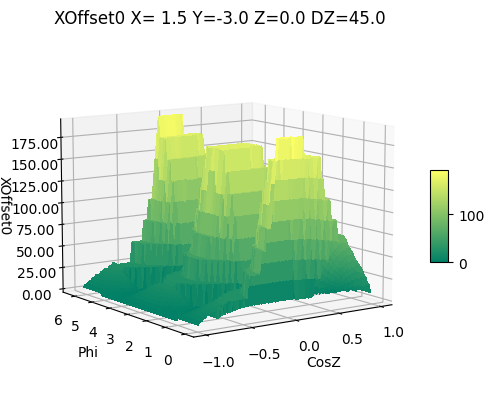

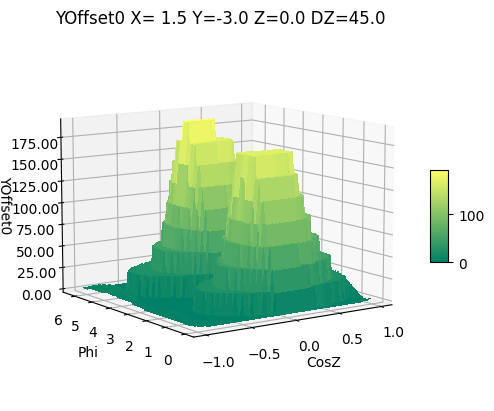

In [24]:
if (RandomAngles==False):
  XX=np.reshape(CosZSample[0,:].numpy(),[NBins,NBins])
  YY=np.reshape(PhiSample[0,:].numpy(),[NBins,NBins])
  XOffset0=np.reshape(XOffset[0,:].numpy(),[NBins,NBins])
  YOffset0=np.reshape(YOffset[0,:].numpy(),[NBins,NBins])

  # Plot the surface.
  fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
  surf = ax.plot_surface(XX, YY, XOffset0, cmap="summer",
                       linewidth=0, antialiased=False)

  # A StrMethodFormatter is used automatically
  ax.zaxis.set_major_formatter('{x:.02f}')
  # Set the axis labels
  #ax.set_title('XOffset0')
  ax.set_title("XOffset0 X= "+str(X) + " Y=" + str(Y) + " Z=" + str(Z) + " DZ=" + str(DZ) )
  ax.set_xlabel('CosZ')
  ax.set_ylabel('Phi')
  ax.set_zlabel('XOffset0')
  #ax.set_zlim(-1.0,1.0)
  # Add a color bar which maps values to colors.
  fig.colorbar(surf, shrink=0.25, aspect=5)
  ax.view_init(elev=10, azim=235, roll=0)

  # Plot the surface.
  fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
  surf = ax.plot_surface(XX, YY, YOffset0, cmap="summer",
                       linewidth=0, antialiased=False)

  # A StrMethodFormatter is used automatically
  ax.zaxis.set_major_formatter('{x:.02f}')
  # Set the axis labels
  #ax.set_title('YOffset0')
  ax.set_title("YOffset0 X= "+str(X) + " Y=" + str(Y) + " Z=" + str(Z) + " DZ=" + str(DZ) )
  ax.set_xlabel('CosZ')
  ax.set_ylabel('Phi')
  ax.set_zlabel('YOffset0')
  #ax.set_zlim(-1.0,1.0)
  # Add a color bar which maps values to colors.
  fig.colorbar(surf, shrink=0.25, aspect=5)
  ax.view_init(elev=10, azim=235, roll=0)
  plt.show()

If generating on a fixed angular grid, display the X and Y Offsets for the detection point within the final unit cell of the virtual detector, mapped onto the the corresponding point within the final unit cell of the real detector.

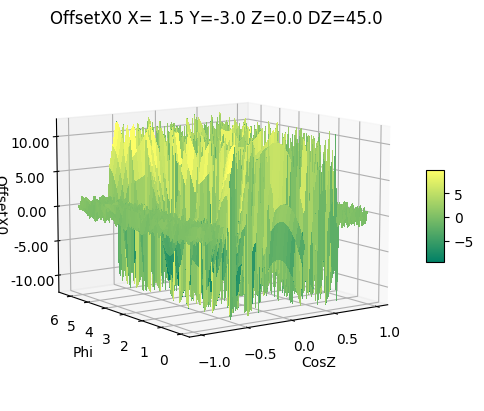

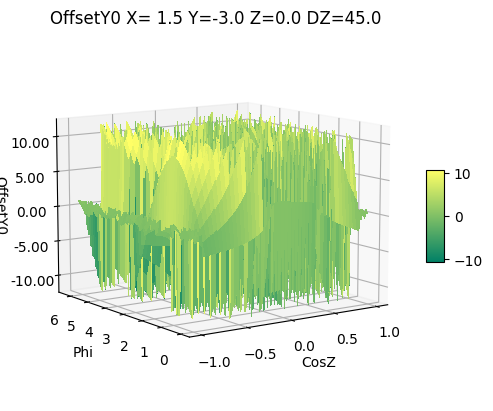

In [25]:
if (RandomAngles==False):
  XX=np.reshape(CosZSample[0,:].numpy(),[NBins,NBins])
  YY=np.reshape(PhiSample[0,:].numpy(),[NBins,NBins])
  OffsetX0=np.reshape(OffsetX[0,:].numpy(),[NBins,NBins])
  OffsetY0=np.reshape(OffsetY[0,:].numpy(),[NBins,NBins])

  # Plot the surface.
  fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
  surf = ax.plot_surface(XX, YY, OffsetX0, cmap="summer",
                       linewidth=0, antialiased=False)

  # A StrMethodFormatter is used automatically
  ax.zaxis.set_major_formatter('{x:.02f}')
  # Set the axis labels
  #ax.set_title('OffsetX0')
  ax.set_title("OffsetX0 X= "+str(X) + " Y=" + str(Y) + " Z=" + str(Z) + " DZ=" + str(DZ) )
  ax.set_xlabel('CosZ')
  ax.set_ylabel('Phi')
  ax.set_zlabel('OffsetX0')
  #ax.set_zlim(-1.0,1.0)
  # Add a color bar which maps values to colors.
  fig.colorbar(surf, shrink=0.25, aspect=5)
  ax.view_init(elev=10, azim=235, roll=0)

  # Plot the surface.
  fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
  surf = ax.plot_surface(XX, YY, OffsetY0, cmap="summer",
                       linewidth=0, antialiased=False)

  # A StrMethodFormatter is used automatically
  ax.zaxis.set_major_formatter('{x:.02f}')
  # Set the axis labels
  #ax.set_title('OffsetY0')
  ax.set_title("OffsetY0 X= "+str(X) + " Y=" + str(Y) + " Z=" + str(Z) + " DZ=" + str(DZ) )
  ax.set_xlabel('CosZ')
  ax.set_ylabel('Phi')
  ax.set_zlabel('OffsetY0')
  #ax.set_zlim(-1.0,1.0)
  # Add a color bar which maps values to colors.
  fig.colorbar(surf, shrink=0.25, aspect=5)
  ax.view_init(elev=10, azim=235, roll=0)
  plt.show()

If generating on a fixed angular grid, display the X and Y continuous coordinates for the photon detection position, for the first event.

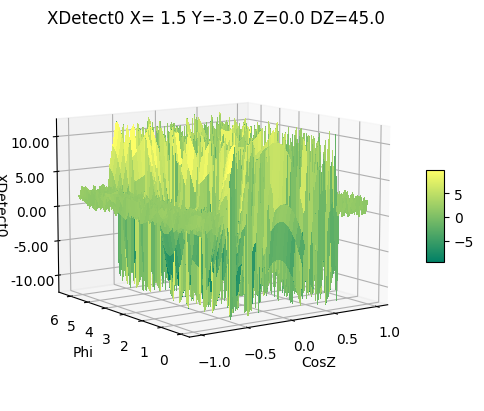

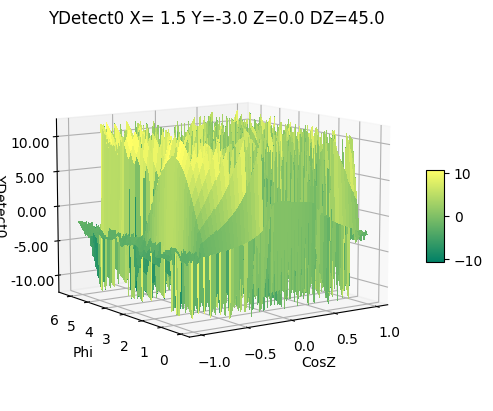

In [26]:
if (RandomAngles==False):
  XX=np.reshape(CosZSample[0,:].numpy(),[NBins,NBins])
  YY=np.reshape(PhiSample[0,:].numpy(),[NBins,NBins])
  XDetect0=np.reshape(XDetect[0,:].numpy(),[NBins,NBins])
  YDetect0=np.reshape(YDetect[0,:].numpy(),[NBins,NBins])

  # Plot the surface.
  fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
  surf = ax.plot_surface(XX, YY, XDetect0, cmap="summer",
                       linewidth=0, antialiased=False)

  # A StrMethodFormatter is used automatically
  ax.zaxis.set_major_formatter('{x:.02f}')
  # Set the axis labels
  #ax.set_title('XDetect0')
  ax.set_title("XDetect0 X= "+str(X) + " Y=" + str(Y) + " Z=" + str(Z) + " DZ=" + str(DZ) )
  ax.set_xlabel('CosZ')
  ax.set_ylabel('Phi')
  ax.set_zlabel('XDetect0')
  #ax.set_zlim(-1.0,1.0)
  # Add a color bar which maps values to colors.
  fig.colorbar(surf, shrink=0.25, aspect=5)
  ax.view_init(elev=10, azim=235, roll=0)

  # Plot the surface.
  fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
  surf = ax.plot_surface(XX, YY, YDetect0, cmap="summer",
                       linewidth=0, antialiased=False)

  # A StrMethodFormatter is used automatically
  ax.zaxis.set_major_formatter('{x:.02f}')
  # Set the axis labels
  #ax.set_title('YDetect0')
  ax.set_title("YDetect0 X= "+str(X) + " Y=" + str(Y) + " Z=" + str(Z) + " DZ=" + str(DZ) )
  ax.set_xlabel('CosZ')
  ax.set_ylabel('Phi')
  ax.set_zlabel('YDetect0')
  #ax.set_zlim(-1.0,1.0)
  # Add a color bar which maps values to colors.
  fig.colorbar(surf, shrink=0.25, aspect=5)
  ax.view_init(elev=10, azim=235, roll=0)
  plt.show()

If generating on a fixed angular grid, display the X and Y continuous coordinates for the photon detection position, for the first event, as a scatter plot

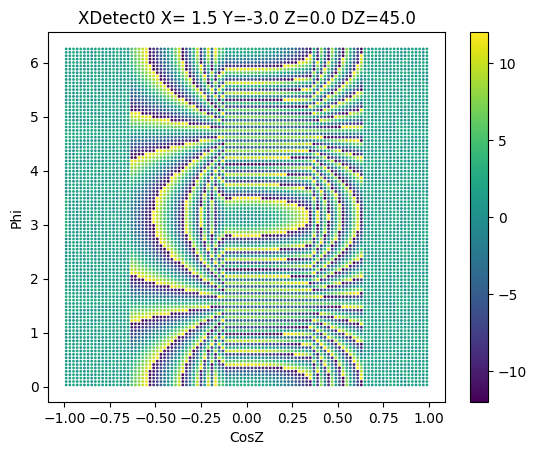

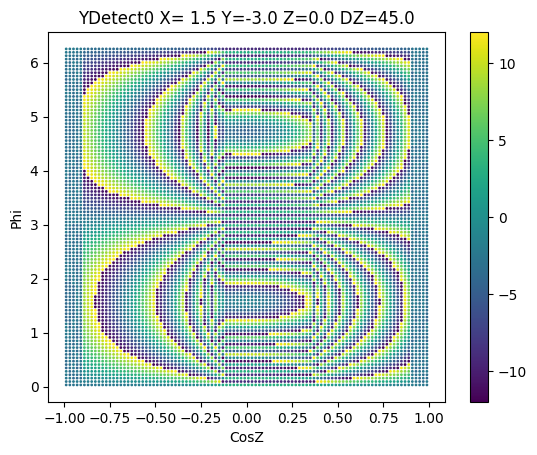

In [27]:
if (RandomAngles==False):
  XDetect0=np.reshape(XDetect[0,:].numpy(),[NBins,NBins])
  YDetect0=np.reshape(YDetect[0,:].numpy(),[NBins,NBins])

  plt.scatter(XX,YY,c=XDetect0,s=1)
  #plt.title("XDetect0")
  plt.title("XDetect0 X= "+str(X) + " Y=" + str(Y) + " Z=" + str(Z) + " DZ=" + str(DZ) )
  plt.xlabel('CosZ')
  plt.ylabel('Phi')
  plt.colorbar()
  plt.show()

  plt.scatter(XX,YY,c=YDetect0,s=1)
  #plt.title("YDetect0")
  plt.title("YDetect0 X= "+str(X) + " Y=" + str(Y) + " Z=" + str(Z) + " DZ=" + str(DZ) )
  plt.xlabel('CosZ')
  plt.ylabel('Phi')
  plt.colorbar()
  plt.show()

If generating on a fixed angular grid, display the reflection survival probability at each X and Y continuous coordinates for the photon detection positions for the first event, as a scatter plot

Then, if generating on a fixed angular grid, display the reflection survival probability-weighted Collection Time distribution at each X and Y continuous coordinates for the photon detection positions for the first event, as a scatter plot

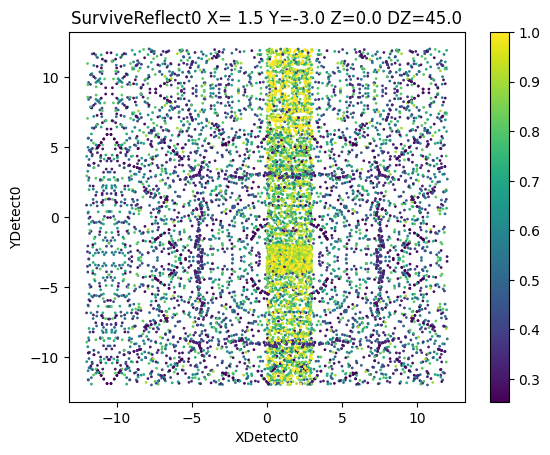

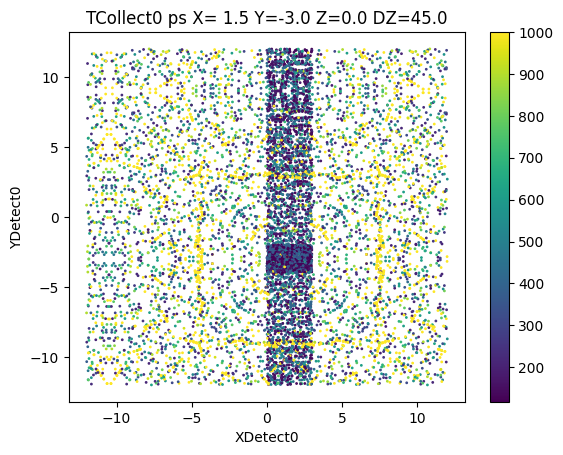

In [28]:
if (RandomAngles==False):
  XDetect0=np.reshape(XDetect[0,:].numpy(),[NBins,NBins])
  YDetect0=np.reshape(YDetect[0,:].numpy(),[NBins,NBins])
  SurviveReflect0=np.reshape(SurviveReflect[0,:].numpy(),[NBins,NBins])
  TCollect0=np.reshape(TCollect[0,:].numpy(),[NBins,NBins])
else:
  XDetect0=XDetect[0,:].numpy()
  YDetect0=YDetect[0,:].numpy()
  SurviveReflect0=SurviveReflect[0,:].numpy()
  TCollect0=TCollect[0,:].numpy()

TMax=1000

plt.scatter(XDetect0,YDetect0,c=SurviveReflect0,s=1)
plt.title("SurviveReflect0 X= "+str(X) + " Y=" + str(Y) + " Z=" + str(Z) + " DZ=" + str(DZ) )
#plt.title("SurviveReflect0")
plt.xlabel('XDetect0')
plt.ylabel('YDetect0')
plt.colorbar()
plt.show()

plt.scatter(XDetect0,YDetect0,c=np.minimum(TMax,TCollect0),s=1)
plt.title("TCollect0 ps X= "+str(X) + " Y=" + str(Y) + " Z=" + str(Z) + " DZ=" + str(DZ) )
#plt.title("TCollect0 ps")
plt.xlabel('XDetect0')
plt.ylabel('YDetect0')
plt.colorbar()
plt.show()


Report mean photon survival probability for the first event.

Display histogram of Reflection Survival Likelihood for the photons in the first even.

Also display histogram of Reflection Survival-weighted photon collection times.

MeanSurvive=0 0.6368806153398043


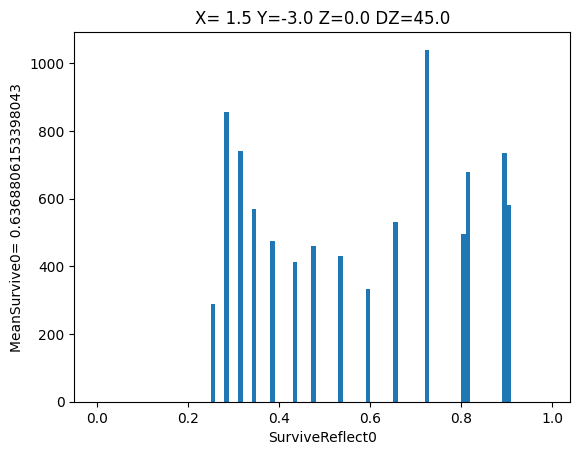

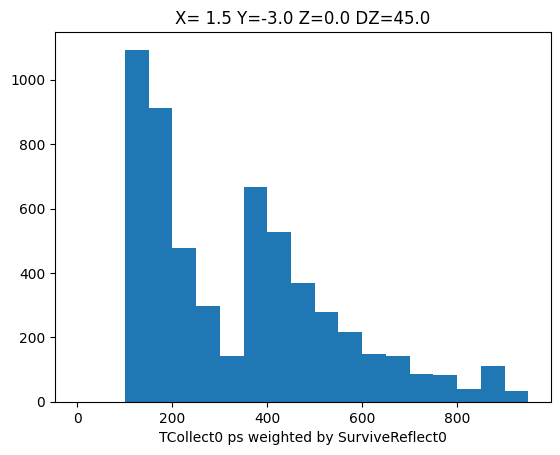

In [29]:
SurviveReflect0=np.reshape(SurviveReflect[0,:].numpy(),[NBins,NBins])
TCollect0=np.reshape(TCollect[0,:].numpy(),[NBins,NBins])
TMax=1000

SurviveBins=np.arange(0,1.0001,0.01)
plt.hist(SurviveReflect0.flatten(), bins=np.arange(0,1.,0.01))
print("MeanSurvive=0 " + str(SurviveReflect0.mean()))
plt.title("X= "+str(X) + " Y=" + str(Y) + " Z=" + str(Z) + " DZ=" + str(DZ) )
plt.ylabel("MeanSurvive0= " + str(SurviveReflect0.mean()))
plt.xlabel('SurviveReflect0')
plt.show()

TCollectBins=np.arange(0,TMax,50)
plt.hist(TCollect0.flatten(), bins=TCollectBins, weights=SurviveReflect0.flatten())
plt.title("X= "+str(X) + " Y=" + str(Y) + " Z=" + str(Z) + " DZ=" + str(DZ) )
plt.xlabel("TCollect0 ps weighted by SurviveReflect0")
plt.show()

Form digitized X and Y outputs, generate a survival-weighted 2D histograms while looping over events.

Display the digitized XY histogram for the first event.

ic| Detect2Dbins: (array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
                   array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]))
ic| DetectXY.size(): torch.Size([1000, 12, 8])
ic| DetectXY0.shape: (12, 8)
<ipython-input-30-f7bb70ab92e6>:33: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('jet') # Get desired colormap - you can change this!


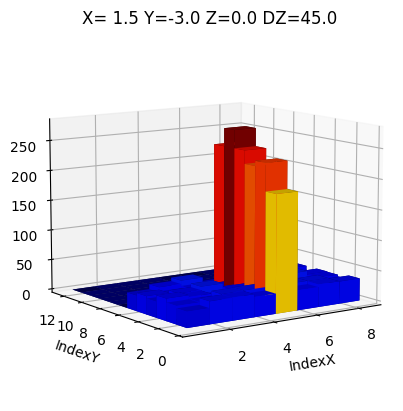

In [30]:
xedges=np.arange(0,1+DetectNX,1)
yedges=np.arange(0,1+DetectNY,1)
Detect2Dbins=(xedges,yedges)
ic(Detect2Dbins)
DetectXY=torch.zeros(NEvents,DetectNY,DetectNX)
ic(DetectXY.size())
#
for thisEvent in range(0,NEvents):
  thisXDetect=torch.floor_divide(XDetect[thisEvent,:]+(DX/2.),dX)
  thisIXDetect=thisXDetect.numpy()
  dT=50
  thisIYDetect=torch.floor_divide(YDetect[thisEvent,:],dY)
  thisIYDetect=thisIYDetect.numpy()
  thisSurviveReflect=SurviveReflect[thisEvent,:].numpy()
  thisDetectXY, thisXedge, thisYedge= np.histogram2d(thisIXDetect,thisIYDetect,bins=Detect2Dbins,weights=thisSurviveReflect)
  DetectXY[thisEvent,:,:]=torch.transpose(torch.tensor(thisDetectXY),0,1)

DetectXY0=DetectXY[0,:,:].numpy()
ic(DetectXY0.shape)
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
#ax = fig.add_subplot(132, title='DetectH', aspect='equal')
xpos, ypos = np.meshgrid(xedges[:-1]+xedges[1:], yedges[:-1]+yedges[1:])

xpos = xpos.flatten()/2.
ypos = ypos.flatten()/2.
zpos = np.zeros_like (xpos)

Hdx = xedges [1] - xedges [0]
Hdy = yedges [1] - yedges [0]
Hdz = DetectXY0.flatten()

from matplotlib import cm
cmap = cm.get_cmap('jet') # Get desired colormap - you can change this!
#plt.colormaps['jet']
max_height = np.max(Hdz)   # get range of colorbars so we can normalize
min_height = np.min(Hdz)
# scale each z to [0,1], and get their rgb values
rgba = [cmap((k-min_height)/max_height) for k in Hdz]


ax.bar3d(xpos, ypos, zpos, Hdx, Hdy, Hdz, color=rgba, zsort='average')
plt.title("X= "+str(X) + " Y=" + str(Y) + " Z=" + str(Z) + " DZ=" + str(DZ) )
plt.xlabel("IndexX")
plt.ylabel("IndexY")
ax.view_init(elev=10, azim=235, roll=0)
#plt.savefig("Your_title_goes_here")
plt.show()


Form digitized XY and T outputs, then generate and store survival-weighted 2D histograms while looping over events.

Display the digitized (XY)T histogram for the first event.

ic| Detect2Dbins: (array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
                         17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
                         34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
                         51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
                         68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
                         85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96]),
                   array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
                         17, 18, 19, 20]))
ic| DetectXYT.size(): torch.Size([1000, 20, 96])
ic| thisIXDetect.shape: (10000,)
ic| thisIYDetect.shape: (10000,)
ic| thisITDetect.shape: (10000,)
ic| thisSurviveReflect.shape: (10000,)
ic| DetectXYT.shape: torch.Size([1000, 20, 96])
ic| DetectXYT0.shape: (20, 96)
<ipython-input-31-b904c7d53697>:51: MatplotlibDeprecatio

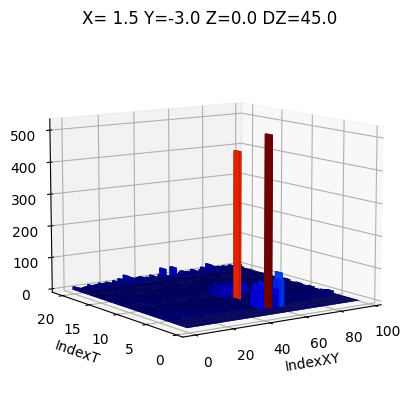

In [31]:
xedges=np.arange(0,1+DetectNX*DetectNY,1)
dT=50
DetectNT=int(1000/50)
yedges=np.arange(0,1+DetectNT,1)
Detect2Dbins=(xedges,yedges)
ic(Detect2Dbins)
DetectNT=torch.tensor(int(1000/50))
DetectNXY=DetectNX*DetectNY
DetectXYT=torch.zeros(NEvents,DetectNT,DetectNXY)
ic(DetectXYT.size())
#
for thisEvent in range(0,NEvents):
  thisXDetect=torch.floor_divide(XDetect[thisEvent,:]+(DX/2.),dX)
  thisIXDetect=thisXDetect.numpy()
  if (thisEvent==0):
     ic(thisIXDetect.shape)
  thisYDetect=torch.floor_divide(YDetect[thisEvent,:]+(DY/2.),dY)
  thisIYDetect=thisYDetect.numpy()
  if (thisEvent==0):
     ic(thisIYDetect.shape)
  thisIXYDetect=thisIYDetect+(DetectNY*thisIXDetect)
  #
  thisITDetect=torch.floor_divide(TCollect[thisEvent,:],50)
  thisITDetect=thisITDetect.numpy()
  if (thisEvent==0):
    ic(thisITDetect.shape)
  thisSurviveReflect=SurviveReflect[thisEvent,:].numpy()
  if (thisEvent==0):
    ic(thisSurviveReflect.shape)
  thisDetectXYT, thisXedge, thisTedge= np.histogram2d(thisIXYDetect,thisITDetect,bins=Detect2Dbins,weights=thisSurviveReflect)
  DetectXYT[thisEvent,:,:]=torch.transpose(torch.tensor(thisDetectXYT),0,1)

ic(DetectXYT.shape)
DetectXYT0=DetectXYT[0,:,:]
DetectXYT0=DetectXYT0.numpy()
ic(DetectXYT0.shape)
#
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
#ax = fig.add_subplot(132, title='DetectH', aspect='equal')
xpos, ypos = np.meshgrid(xedges[:-1]+xedges[1:], yedges[:-1]+yedges[1:])

xpos = xpos.flatten()/2.
ypos = ypos.flatten()/2.
zpos = np.zeros_like (xpos)

Hdx = xedges [1] - xedges [0]
Hdy = yedges [1] - yedges [0]
Hdz = DetectXYT0.flatten()

from matplotlib import cm
cmap = cm.get_cmap('jet') # Get desired colormap - you can change this!
#plt.colormaps['jet']
max_height = np.max(Hdz)   # get range of colorbars so we can normalize
min_height = np.min(Hdz)
# scale each z to [0,1], and get their rgb values
rgba = [cmap((k-min_height)/max_height) for k in Hdz]


ax.bar3d(xpos, ypos, zpos, Hdx, Hdy, Hdz, color=rgba, zsort='average')
plt.title("X= "+str(X) + " Y=" + str(Y) + " Z=" + str(Z) + " DZ=" + str(DZ) )
plt.xlabel("IndexXY")
plt.ylabel("IndexT")
ax.view_init(elev=10, azim=235, roll=0)
#plt.savefig("Your_title_goes_here")
plt.show()

Form digitized X and T outputs, athen generate and store survival-weighted 2D histograms while looping over events.

Display the digitized XT histogram for the first event.

ic| Detect2Dbins: (array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
                   array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
                         17, 18, 19, 20]))
ic| DetectXY.size(): torch.Size([1000, 12, 8])
ic| thisIXDetect.shape: (10000,)
ic| thisITDetect.shape: (10000,)
ic| thisSurviveReflect.shape: (10000,)
ic| DetectXT.shape: torch.Size([1000, 20, 8])
ic| DetectXT0.shape: (20, 8)
<ipython-input-32-574ef8635f4e>:44: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('jet') # Get desired colormap - you can change this!


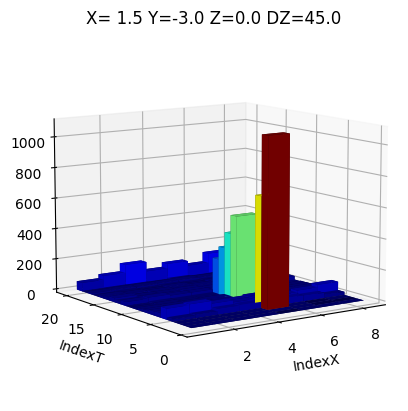

In [32]:
xedges=np.arange(0,1+DetectNX,1)
dT=50
DetectNT=int(1000/50)
yedges=np.arange(0,1+DetectNT,1)
Detect2Dbins=(xedges,yedges)
ic(Detect2Dbins)
DetectNT=torch.tensor(int(1000/50))
DetectXT=torch.zeros(NEvents,DetectNT,DetectNX)
ic(DetectXY.size())
#
for thisEvent in range(0,NEvents):
  thisXDetect=torch.floor_divide(XDetect[thisEvent,:]+(DX/2.),dX)
  thisIXDetect=thisXDetect.numpy()
  if (thisEvent==0):
     ic(thisIXDetect.shape)
  thisITDetect=torch.floor_divide(TCollect[thisEvent,:],50)
  thisITDetect=thisITDetect.numpy()
  if (thisEvent==0):
    ic(thisITDetect.shape)
  thisSurviveReflect=SurviveReflect[thisEvent,:].numpy()
  if (thisEvent==0):
    ic(thisSurviveReflect.shape)
  thisDetectXT, thisXedge, thisTedge= np.histogram2d(thisIXDetect,thisITDetect,bins=Detect2Dbins,weights=thisSurviveReflect)
  DetectXT[thisEvent,:,:]=torch.transpose(torch.tensor(thisDetectXT),0,1)

ic(DetectXT.shape)
DetectXT0=DetectXT[0,:,:]
DetectXT0=DetectXT0.numpy()
ic(DetectXT0.shape)

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
#ax = fig.add_subplot(132, title='DetectH', aspect='equal')
xpos, ypos = np.meshgrid(xedges[:-1]+xedges[1:], yedges[:-1]+yedges[1:])

xpos = xpos.flatten()/2.
ypos = ypos.flatten()/2.
zpos = np.zeros_like (xpos)

Hdx = xedges [1] - xedges [0]
Hdy = yedges [1] - yedges [0]
Hdz = DetectXT0.flatten()

from matplotlib import cm
cmap = cm.get_cmap('jet') # Get desired colormap - you can change this!
#plt.colormaps['jet']
max_height = np.max(Hdz)   # get range of colorbars so we can normalize
min_height = np.min(Hdz)
# scale each z to [0,1], and get their rgb values
rgba = [cmap((k-min_height)/max_height) for k in Hdz]


ax.bar3d(xpos, ypos, zpos, Hdx, Hdy, Hdz, color=rgba, zsort='average')
plt.title("X= "+str(X) + " Y=" + str(Y) + " Z=" + str(Z) + " DZ=" + str(DZ) )
plt.xlabel("IndexX")
plt.ylabel("IndexT")
ax.view_init(elev=10, azim=235, roll=0)
#plt.savefig("Your_title_goes_here")
plt.show()

Form digitized X and Y outputs, then generate and store survival-weighted 2D histograms while looping over events.

Display the digitized XT histogram for the first event.

Form digitized Y and T outputs, then generate and store survival-weighted 2D histograms while looping over events.

Display the digitized YT histogram for the first event.

ic| Detect2Dbins: (array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
                   array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
                         17, 18, 19, 20]))
ic| DetectXY.size(): torch.Size([1000, 12, 8])
ic| thisIYDetect.shape: (10000,)
ic| thisITDetect.shape: (10000,)
ic| thisSurviveReflect.shape: (10000,)
ic| DetectYT.shape: torch.Size([1000, 20, 12])
ic| DetectYT0.shape: (20, 12)
<ipython-input-33-9149ab9c7333>:44: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('jet') # Get desired colormap - you can change this!


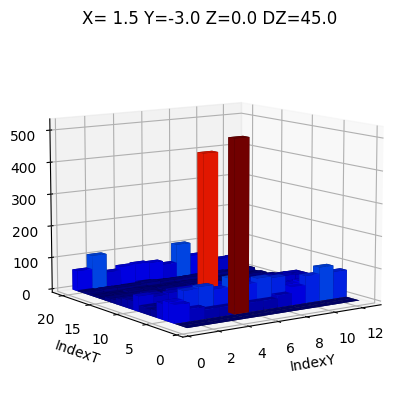

In [33]:
xedges=np.arange(0,1+DetectNY,1)
dT=50
DetectNT=int(1000/50)
yedges=np.arange(0,1+DetectNT,1)
Detect2Dbins=(xedges,yedges)
ic(Detect2Dbins)
DetectNT=torch.tensor(int(1000/50))
DetectYT=torch.zeros(NEvents,DetectNT,DetectNY)
ic(DetectXY.size())
#
for thisEvent in range(0,NEvents):
  thisYDetect=torch.floor_divide(YDetect[thisEvent,:]+(DY/2.),dY)
  thisIYDetect=thisYDetect.numpy()
  if (thisEvent==0):
     ic(thisIYDetect.shape)
  thisITDetect=torch.floor_divide(TCollect[thisEvent,:],50)
  thisITDetect=thisITDetect.numpy()
  if (thisEvent==0):
    ic(thisITDetect.shape)
  thisSurviveReflect=SurviveReflect[thisEvent,:].numpy()
  if (thisEvent==0):
    ic(thisSurviveReflect.shape)
  thisDetectYT, thisXedge, thisTedge= np.histogram2d(thisIYDetect,thisITDetect,bins=Detect2Dbins,weights=thisSurviveReflect)
  DetectYT[thisEvent,:,:]=torch.transpose(torch.tensor(thisDetectYT),0,1)

ic(DetectYT.shape)
DetectYT0=DetectYT[0,:,:]
DetectYT0=DetectYT0.numpy()
ic(DetectYT0.shape)

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
#ax = fig.add_subplot(132, title='DetectH', aspect='equal')
xpos, ypos = np.meshgrid(xedges[:-1]+xedges[1:], yedges[:-1]+yedges[1:])

xpos = xpos.flatten()/2.
ypos = ypos.flatten()/2.
zpos = np.zeros_like (xpos)

Hdx = xedges [1] - xedges [0]
Hdy = yedges [1] - yedges [0]
Hdz = DetectYT0.flatten()

from matplotlib import cm
cmap = cm.get_cmap('jet') # Get desired colormap - you can change this!
#plt.colormaps['jet']
max_height = np.max(Hdz)   # get range of colorbars so we can normalize
min_height = np.min(Hdz)
# scale each z to [0,1], and get their rgb values
rgba = [cmap((k-min_height)/max_height) for k in Hdz]


ax.bar3d(xpos, ypos, zpos, Hdx, Hdy, Hdz, color=rgba, zsort='average')
plt.title("X= "+str(X) + " Y=" + str(Y) + " Z=" + str(Z) + " DZ=" + str(DZ) )
plt.xlabel("IndexY")
plt.ylabel("IndexT")
ax.view_init(elev=10, azim=235, roll=0)
#plt.savefig("Your_title_goes_here")
plt.show()

Looping over all events, generate a set of histograms for the XYT data, and store them.

Generate and display a 2D display from XY,T for the first event, for histogramed survival-weighted photon data for the first event

ic| DetectXYT.size(): torch.Size([1000, 20, 96])
ic| thisIXDetect.shape: (10000,)
ic| thisIYDetect.shape: (10000,)
ic| thisITDetect.shape: (10000,)
ic| thisSurviveReflect.shape: (10000,)
ic| DetectXYT0.shape: (20, 96)
ic| xedges.shape: (97,)
ic| yedges.shape: (21,)
ic| HX.shape: (21, 97)
ic| HY.shape: (21, 97)
ic| DetectXYT0.shape: (20, 96)


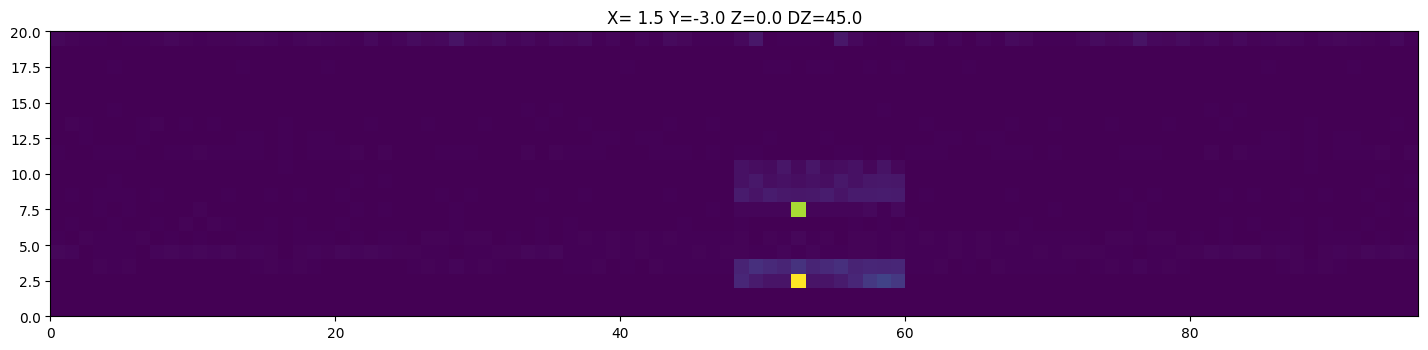

ic| EventData.shape: (8, 12, 20)
ic| EventData[:,5,2]: array([ 0.       , 61.22     ,  1.3122   , 39.4722   ,  0.       ,
                              0.9565938,  0.       ,  0.6276212], dtype=float32)


array([ 0.       , 61.22     ,  1.3122   , 39.4722   ,  0.       ,
        0.9565938,  0.       ,  0.6276212], dtype=float32)

In [34]:
DetectXYT=torch.zeros(NEvents,DetectNT,DetectNX*DetectNY)
ic(DetectXYT.size())
xedges=np.arange(0,1+DetectNX*DetectNY,1)
yedges=np.arange(0,1+DetectNT,1)
Detect2Dbins=(xedges,yedges)

for thisEvent in range(0,NEvents):
  thisXDetect=torch.floor_divide(XDetect[thisEvent,:]+(DX/2.),dX)
  thisIXDetect=thisXDetect.numpy()
  if (thisEvent==0):
     ic(thisIXDetect.shape)
  thisYDetect=torch.floor_divide(YDetect[thisEvent,:]+(DY/2.),dY)
  thisIYDetect=thisYDetect.numpy()
  if (thisEvent==0):
     ic(thisIYDetect.shape)
  thisIXYDetect=thisIYDetect+(DetectNY*thisIXDetect)
  #
  thisITDetect=torch.floor_divide(TCollect[thisEvent,:],dT)
  thisITDetect=thisITDetect.numpy()
  if (thisEvent==0):
    ic(thisITDetect.shape)
  thisSurviveReflect=SurviveReflect[thisEvent,:].numpy()
  if (thisEvent==0):
    ic(thisSurviveReflect.shape)
  thisDetectXYT, thisXedge, thisTedge= np.histogram2d(thisIXYDetect,thisITDetect,bins=Detect2Dbins,weights=thisSurviveReflect)
  DetectXYT[thisEvent,:,:]=torch.transpose(torch.tensor(thisDetectXYT),0,1)

DetectXYT0=(DetectXYT[0,:].numpy()).reshape([DetectNT,DetectNX*DetectNY])

ic(DetectXYT0.shape)

fig = plt.figure(figsize=(60, 30))

ThisTitle="X= "+str(X) + " Y=" + str(Y) + " Z=" + str(Z) + " DZ=" + str(DZ)

ax = fig.add_subplot(132, title=ThisTitle,
        aspect='equal')
ic(xedges.shape)
ic(yedges.shape)
HX, HY = np.meshgrid(xedges, yedges)
ic(HX.shape)
ic(HY.shape)
ic(DetectXYT0.shape)

ax.pcolormesh(HX, HY, DetectXYT0)
plt.show()

EventData=np.reshape(DetectXYT0,[DetectNX,DetectNY,DetectNT])
ic(EventData.shape)
ic(EventData[:,5,2])

Looping over all events, generate a set of histograms for the XYT data and all its slices, and store them.

Display histograms of survival-weighted 1D data slices for the first event

ic| NPhotons: 10000
ic| NEvents: 1000
ic| IEvent.size(): torch.Size([1000, 10000])
ic| IEvent[0][0]: tensor(0)
ic| IEvent[0][1]: tensor(1)
ic| IEvent[1][0]: tensor(0)
ic| IXDetect.size(): torch.Size([1000, 10000])
ic| Data.size(): torch.Size([1000, 8, 12, 20])
ic| thisSurviveReflect.size: 10000
ic| thisSurviveReflect.dtype: dtype('float64')
ic| NHBins_Hy: 12
ic| NHBins_Hx: 8


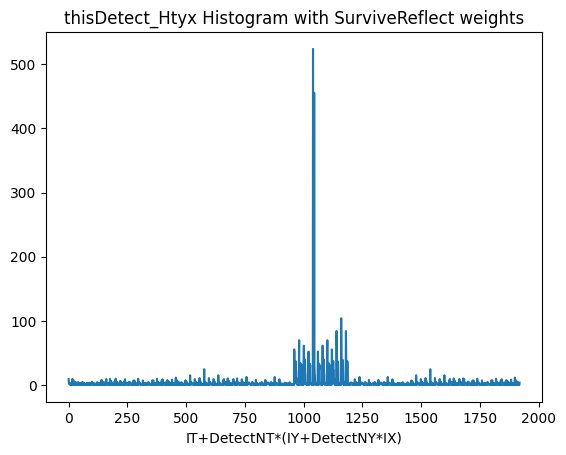

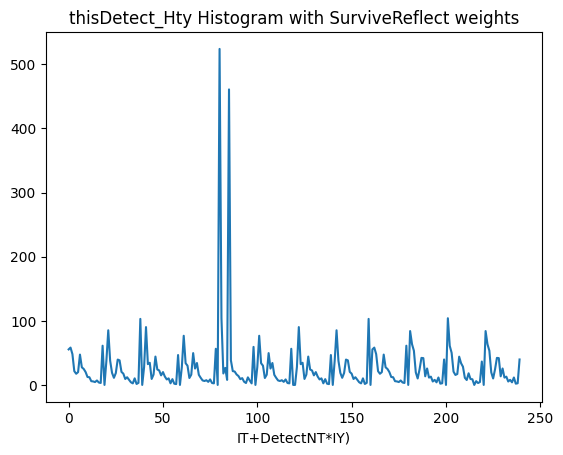

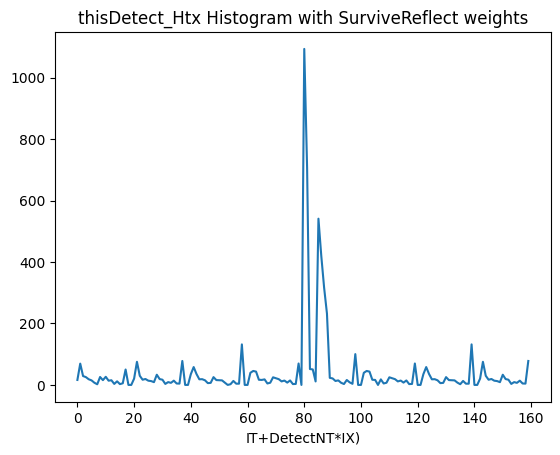

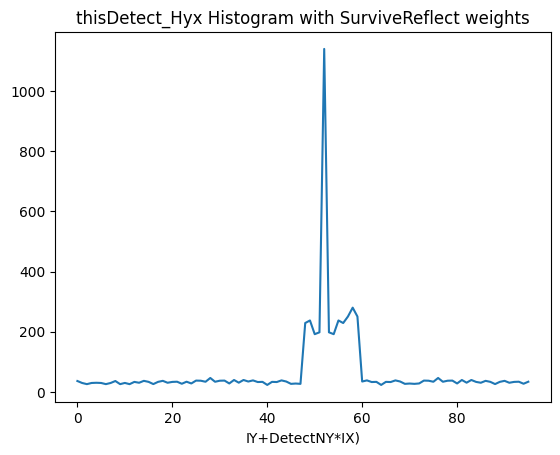

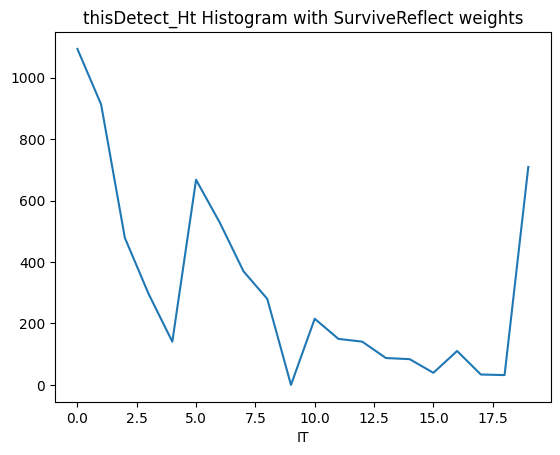

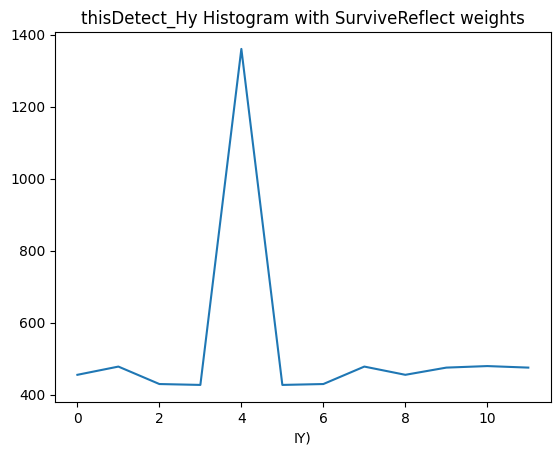

ic| Detect_Hx: array([ 351.89545423,  385.80214371,  426.75080518,  379.68667287,
                      3632.43145566,  379.68667287,  426.75080518,  385.80214371])


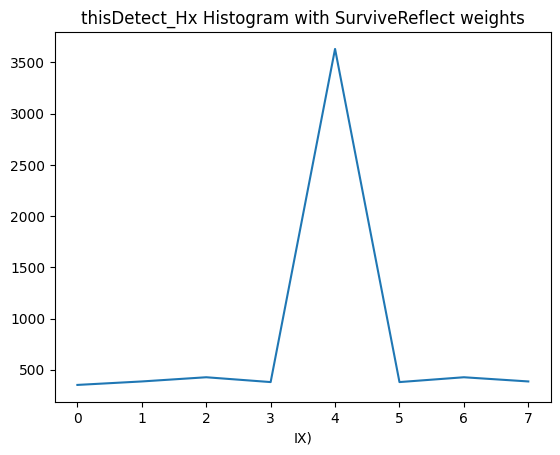

ic| thisData.shape: (20, 12, 8)
ic| Data[iEvent,:,:,:].shape: torch.Size([8, 12, 20])
ic| Data.size(): torch.Size([1000, 8, 12, 20])


torch.Size([1000, 8, 12, 20])

In [35]:
ic(NPhotons)
ic(NEvents)
#
# Digitize with perfect modulation transfer function (MTF) and histogram
IEvent=torch.reshape(torch.arange(0,NEvents).repeat(NPhotons),[NEvents, NPhotons])
ic(IEvent.size())
ic(IEvent[0][0])
ic(IEvent[0][1])
ic(IEvent[1][0])

IXDetect=(torch.floor_divide((DX/2.)+XDetect,dX)).int()
ic(IXDetect.size())
IYDetect=(torch.floor_divide((DY/2.)+YDetect,dY)).int()
ITDetect=(torch.floor_divide(TCollect,50)).int()
DetectNT=torch.tensor(int(1000/50))

NHBins_Htyx=((DetectNT*DetectNY*DetectNX).int()).numpy()
NHBins_Hty=((DetectNT*DetectNY).int()).numpy()
DetectNT=int(1000/50)
NHBins_Htx=int(DetectNT*DetectNX)
NHBins_Hyx=int(DetectNY*DetectNX)
NHBins_Ht=DetectNT
NHBins_Hy=DetectNY
NHBins_Hx=DetectNX
#
xedges=np.arange(0,1+DetectNT,1)
yedges=np.arange(0,1+DetectNY,1)
HBins_Hty=(xedges,yedges)
xedges=np.arange(0,1+DetectNT,1)
yedges=np.arange(0,1+DetectNX,1)
HBins_Htx=(xedges,yedges)
xedges=np.arange(0,1+DetectNY,1)
yedges=np.arange(0,1+DetectNX,1)
HBins_Hyx=(xedges,yedges)

#IDetect=ITDetect+DetectNT*(IYDetect+DetectNY*(IXDetect+DetectNX*IEvent))
Data=torch.zeros(NEvents,DetectNX,DetectNY,DetectNT)
ic(Data.size())

for iEvent in range(0,NEvents):
  #Collect floating point data for this event
  thisTDetect=ITDetect[iEvent,:]
  thisYDetect=IYDetect[iEvent,:]
  thisXDetect=IXDetect[iEvent,:]
  #
  # Form index for histogramming
  #thisDetect=(thisTDetect+DetectNT*(thisYDetect+DetectNY*thisXDetect))
  #thisDetect1=thisTDetect
  #thisDetect2=np.add(thisYDetect,DetectNY*thisDetect1)
  #thisDetect_tyx=np.add(thisXDetect,DetectNX*thisDetect2)
  thisDetect1=thisXDetect
  thisDetect2=np.add(thisYDetect,DetectNY*thisDetect1)
  thisDetect_tyx=np.add(thisTDetect,DetectNT*thisDetect2)
  #
  thisDetect_ty=np.add(thisTDetect,DetectNT*thisYDetect)
  thisDetect_tx=np.add(thisTDetect,DetectNT*thisXDetect)
  thisDetect_yx=np.add(thisYDetect,DetectNY*thisXDetect)
  #
  thisSurviveReflect=(SurviveReflect[iEvent,:])
  thisSurviveReflect=thisSurviveReflect.numpy()
  if (iEvent==0):
    ic(thisSurviveReflect.size)
    ic(thisSurviveReflect.dtype)
    ic(NHBins_Hy)
    ic(NHBins_Hx)
    #
    Detect_Htyx, Htyx_edge = np.histogram(thisDetect_tyx, bins=NHBins_Htyx, weights=thisSurviveReflect)
    Detect_Hty,  Hty_edge  = np.histogram(thisDetect_ty,  bins=NHBins_Hty,  weights=thisSurviveReflect)
    Detect_Htx,  htx_edge  = np.histogram(thisDetect_tx,  bins=NHBins_Htx,  weights=thisSurviveReflect)
    Detect_Hyx,  hyx_edge  = np.histogram(thisDetect_yx,  bins=NHBins_Hyx,  weights=thisSurviveReflect)
    Detect_Ht,   ht_edge   = np.histogram(thisTDetect,    bins=NHBins_Ht,   weights=thisSurviveReflect)
    Detect_Hy,   hy_edge   = np.histogram(thisYDetect,    bins=NHBins_Hy,   weights=thisSurviveReflect)
    Detect_Hx,   hx_edge   = np.histogram(thisXDetect,    bins=NHBins_Hx,   weights=thisSurviveReflect)
    #
    plt.plot(Detect_Htyx)
    plt.title("thisDetect_Htyx Histogram with SurviveReflect weights")
    plt.xlabel('IT+DetectNT*(IY+DetectNY*IX)')
    plt.show()
    #
    plt.plot(Detect_Hty)
    plt.title("thisDetect_Hty Histogram with SurviveReflect weights")
    plt.xlabel('IT+DetectNT*IY)')
    plt.show()
    #
    plt.plot(Detect_Htx)
    plt.title("thisDetect_Htx Histogram with SurviveReflect weights")
    plt.xlabel('IT+DetectNT*IX)')
    plt.show()
    #
    plt.plot(Detect_Hyx)
    plt.title("thisDetect_Hyx Histogram with SurviveReflect weights")
    plt.xlabel('IY+DetectNY*IX)')
    plt.show()
    #
    plt.plot(Detect_Ht)
    plt.title("thisDetect_Ht Histogram with SurviveReflect weights")
    plt.xlabel('IT')
    plt.show()
    #
    plt.plot(Detect_Hy)
    plt.title("thisDetect_Hy Histogram with SurviveReflect weights")
    plt.xlabel('IY)')
    plt.show()
    #
    ic(Detect_Hx)
    plt.plot(Detect_Hx)
    plt.title("thisDetect_Hx Histogram with SurviveReflect weights")
    plt.xlabel('IX)')
    plt.show()

   #
  thisData=np.reshape(Detect_Htyx,[DetectNT,DetectNY,DetectNX])
  if (iEvent==0):
    ic(thisData.shape)
    ic(Data[iEvent,:,:,:].shape)

  Data[iEvent,:,:,:]=torch.tensor(np.reshape(thisData,[DetectNX,DetectNY,DetectNT]))

ic(Data.size())

Generate and display a 2D histogram of X,T from the survival-weighted photon list data for the first event, starting from the set of XYT data tensors for all events.

ic| TXData0.shape: (8, 20)
ic| Detect2Dbins: (array([-0.5,  0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5]),
                   array([-0.5,  0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5,
                         10.5, 11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5]))
ic| DetectTX0.shape: (20, 8)
<ipython-input-36-c613f4f328e9>:26: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('jet') # Get desired colormap - you can change this!


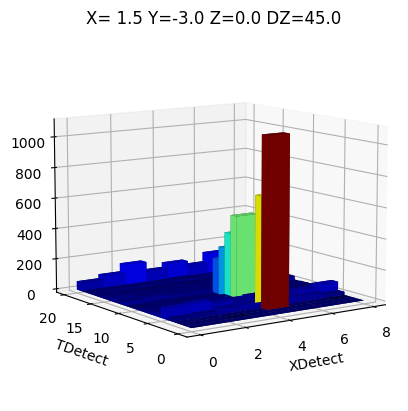

In [36]:
Data0=Data[0,:,:,:]
Data0=Data0.numpy()
TXData0=np.sum(Data0,axis=1)
ic(TXData0.shape)

xedges=np.arange(0,DetectNX+1,1)-1/2
yedges=np.arange(0,DetectNT+1,1)-1/2
Detect2Dbins=(xedges,yedges)
ic(Detect2Dbins)
DetectTX0=TXData0.T
#
ic(DetectTX0.shape)
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
#ax = fig.add_subplot(132, title='DetectH', aspect='equal')
xpos, ypos = np.meshgrid(xedges[:-1]+xedges[1:], yedges[:-1]+yedges[1:])

xpos = xpos.flatten()/2.
ypos = ypos.flatten()/2.
zpos = np.zeros_like (xpos)

Hdx = xedges [1] - xedges [0]
Hdy = yedges [1] - yedges [0]
Hdz = DetectXT0.flatten()

from matplotlib import cm
cmap = cm.get_cmap('jet') # Get desired colormap - you can change this!
#plt.colormaps['jet']
max_height = np.max(Hdz)   # get range of colorbars so we can normalize
min_height = np.min(Hdz)
# scale each z to [0,1], and get their rgb values
rgba = [cmap((k-min_height)/max_height) for k in Hdz]


ax.bar3d(xpos, ypos, zpos, Hdx, Hdy, Hdz, color=rgba, zsort='average')
plt.title("X= "+str(X) + " Y=" + str(Y) + " Z=" + str(Z) + " DZ=" + str(DZ) )
plt.xlabel("XDetect")
plt.ylabel("TDetect")
ax.view_init(elev=10, azim=235, roll=0)
#plt.savefig("Your_title_goes_here")
plt.show()

Generate and display a 2D histogram of Y,T from the survival-weighted photon list data for the first event, starting from the set of XYT data tensors for all events.

ic| Data0.shape: (8, 12, 20)
ic| TYData0.shape: (20, 12)
ic| Detect2Dbins: (array([-0.5,  0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5,
                         10.5, 11.5]),
                   array([-0.5,  0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5,
                         10.5, 11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5]))
ic| DetectYT0.shape: (20, 12)
<ipython-input-37-74e08dbaabfa>:27: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('jet') # Get desired colormap - you can change this!


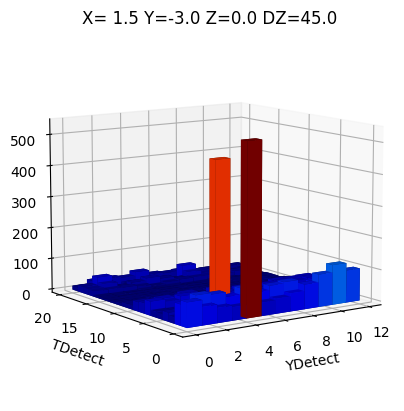

In [37]:
Data0=Data[0,:,:,:]
Data0=Data0.numpy()
ic(Data0.shape)
TYData0=np.sum(Data0,axis=0).T
ic(TYData0.shape)

xedges=np.arange(0,DetectNY+1,1)-1/2
yedges=np.arange(0,DetectNT+1,1)-1/2
Detect2Dbins=(xedges,yedges)
ic(Detect2Dbins)
DetectYT0=TYData0
#
ic(DetectYT0.shape)
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
#ax = fig.add_subplot(132, title='DetectH', aspect='equal')
xpos, ypos = np.meshgrid(xedges[:-1]+xedges[1:], yedges[:-1]+yedges[1:])

xpos = xpos.flatten()/2.
ypos = ypos.flatten()/2.
zpos = np.zeros_like (xpos)

Hdx = xedges [1] - xedges [0]
Hdy = yedges [1] - yedges [0]
Hdz = DetectYT0.flatten()

from matplotlib import cm
cmap = cm.get_cmap('jet') # Get desired colormap - you can change this!
#plt.colormaps['jet']
max_height = np.max(Hdz)   # get range of colorbars so we can normalize
min_height = np.min(Hdz)
# scale each z to [0,1], and get their rgb values
rgba = [cmap((k-min_height)/max_height) for k in Hdz]


ax.bar3d(xpos, ypos, zpos, Hdx, Hdy, Hdz, color=rgba, zsort='average')
plt.title("X= "+str(X) + " Y=" + str(Y) + " Z=" + str(Z) + " DZ=" + str(DZ) )
plt.xlabel("YDetect")
plt.ylabel("TDetect")
ax.view_init(elev=10, azim=235, roll=0)
#plt.savefig("Your_title_goes_here")
plt.show()

Generate and display a 2D histogram of X,Y from the survival-weighted photon list data for the first event, starting from the set of XYT data tensors for all events.

ic| Data0.shape: (8, 12, 20)
ic| XYData0.shape: (8, 12)
ic| Detect2Dbins: (array([-0.5,  0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5]),
                   array([-0.5,  0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5,
                         10.5, 11.5]))
ic| DetectXY0.shape: (12, 8)
<ipython-input-39-644a9a62ab27>:27: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('jet') # Get desired colormap - you can change this!


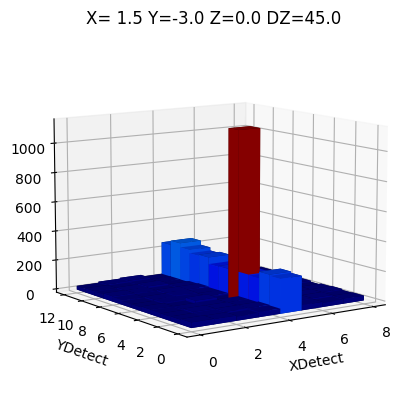

In [39]:
Data0=Data[0,:,:,:]
Data0=Data0.numpy()
ic(Data0.shape)
XYData0=np.sum(Data0,axis=2)
ic(XYData0.shape)

xedges=np.arange(0,DetectNX+1,1)-1/2
yedges=np.arange(0,DetectNY+1,1)-1/2
Detect2Dbins=(xedges,yedges)
ic(Detect2Dbins)
DetectXY0=XYData0.T
#
ic(DetectXY0.shape)
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
#ax = fig.add_subplot(132, title='DetectH', aspect='equal')
xpos, ypos = np.meshgrid(xedges[:-1]+xedges[1:], yedges[:-1]+yedges[1:])

xpos = xpos.flatten()/2.
ypos = ypos.flatten()/2.
zpos = np.zeros_like (xpos)

Hdx = xedges [1] - xedges [0]
Hdy = yedges [1] - yedges [0]
Hdz = DetectXY0.flatten()

from matplotlib import cm
cmap = cm.get_cmap('jet') # Get desired colormap - you can change this!
#plt.colormaps['jet']
max_height = np.max(Hdz)   # get range of colorbars so we can normalize
min_height = np.min(Hdz)
# scale each z to [0,1], and get their rgb values
rgba = [cmap((k-min_height)/max_height) for k in Hdz]

ax.bar3d(xpos, ypos, zpos, Hdx, Hdy, Hdz, color=rgba, zsort='average')
plt.title("X= "+str(X) + " Y=" + str(Y) + " Z=" + str(Z) + " DZ=" + str(DZ) )
plt.xlabel("XDetect")
plt.ylabel("YDetect")
ax.view_init(elev=10, azim=235, roll=0)
#plt.savefig("Your_title_goes_here")
plt.show()